 # Cardiovascular Diseases - Heart Failure Prediction
    
Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels. They include:

coronary heart disease – a disease of the blood vessels supplying the heart muscle;
cerebrovascular disease – a disease of the blood vessels supplying the brain;
peripheral arterial disease – a disease of blood vessels supplying the arms and legs;
rheumatic heart disease – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;
congenital heart disease – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and
deep vein thrombosis and pulmonary embolism – blood clots in the leg veins, which can dislodge and move to the heart and lungs.
Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.
    
  
 ## Dataset Link 
 
https://github.com/nileshely/Heart-Failure-Prediction
 
 ## Dataset Description
 The dataset comprises 918 instances and 12 features related to cardiovascular health, aimed at predicting heart disease. Each instance includes information such as the patient's age, sex, chest pain type, resting blood pressure, serum cholesterol levels, fasting blood sugar, resting electrocardiogram results, maximum heart rate achieved, presence of exercise-induced angina, ST depression measured during exercise, and the slope of the peak exercise ST segment. The target variable, "HeartDisease," indicates the presence (1) or absence (0) of heart disease. This dataset facilitates exploratory data analysis and the development of predictive models to assist in early detection and management of cardiovascular diseases, which are a leading cause of global mortality.
 
 ### References
 
A Comparative Study for Time-to-Event Analysis and Survival Prediction for Heart Failure Condition using Machine Learning Techniques (July 2022)
   https://doi.org/10.35882/jeeemi.v4i3.225

### Required Libraries and Utilities

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [18]:
from ReusableUtils import ReusableUtils
utils = ReusableUtils()

### Set Notebook Configuration Parameters 

In [19]:
utils.setNotebookConfigParams()

### Utility Functions

### Import Data

In [3]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = 'heart.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
heart_faliure_data.shape

(918, 12)

In [108]:
df=pd.read_csv('heart.csv')
# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Age': [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
Unique values in 'Sex': ['M' 'F']
Unique values in 'ChestPainType': ['ATA' 'NAP' 'ASY' 'TA']
Unique values in 'RestingBP': [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
Unique values in 'Cholesterol': [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 

In [109]:
# Get minimum values for numerical columns
min_values = df.min()

# Get maximum values for numerical columns
max_values = df.max()

# Combine the results into a DataFrame for better visualization
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})

print(min_max_df)


                 Min  Max
Age               28   77
Sex                F    M
ChestPainType    ASY   TA
RestingBP          0  200
Cholesterol        0  603
FastingBS          0    1
RestingECG       LVH   ST
MaxHR             60  202
ExerciseAngina     N    Y
Oldpeak         -2.6  6.2
ST_Slope        Down   Up
HeartDisease       0    1


In [5]:
# Check the total missing values in each column.
print("Total NULL Values in each columns")
print("*********************************")
print(heart_faliure_data.isnull().sum())

Total NULL Values in each columns
*********************************
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


<Figure size 5760x3840 with 0 Axes>

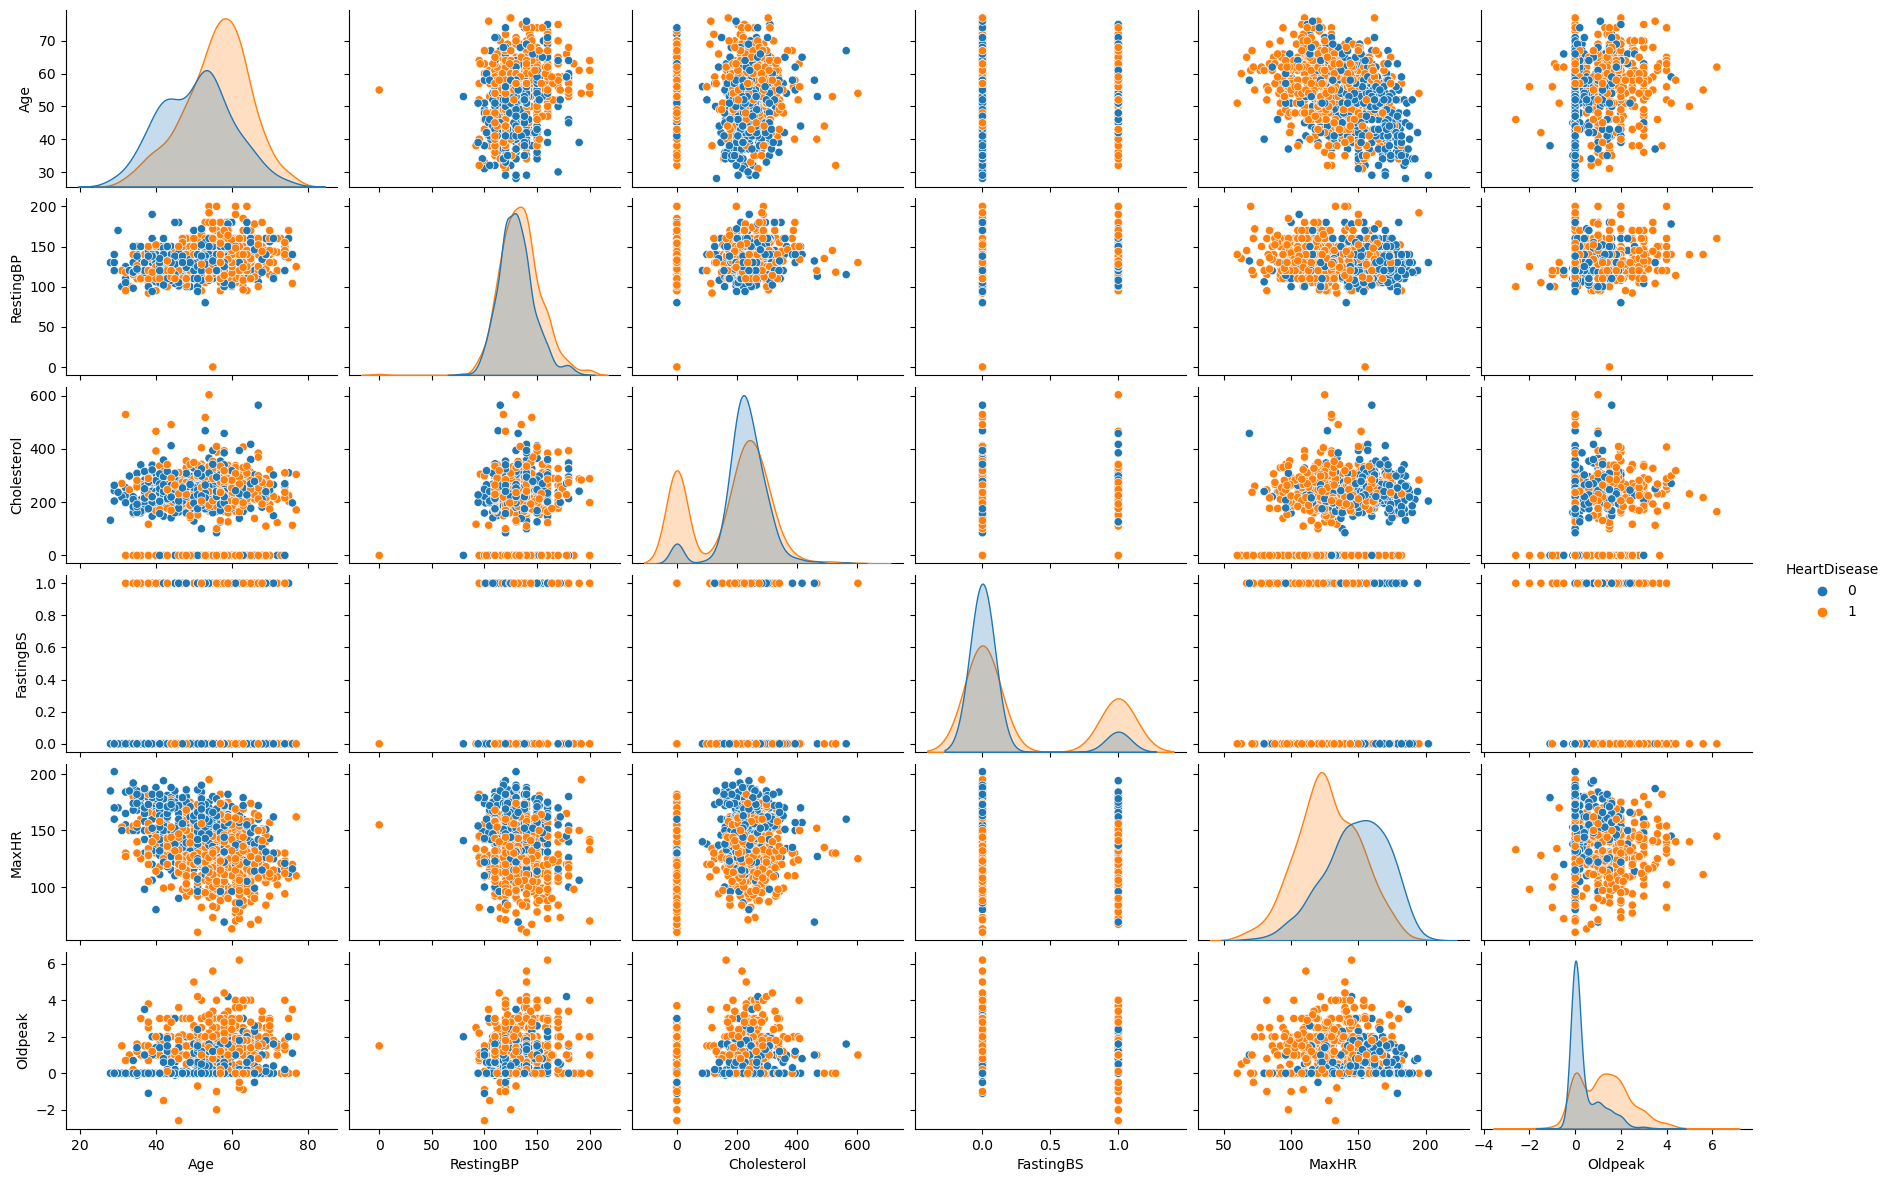

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('heart.csv')

# Increase figure size and DPI for better quality
plt.figure(figsize=(12, 8), dpi=480)

# Customize pairplot with increased aspect and height
sns.pairplot(df, hue='HeartDisease', height=2, aspect=1.5)

plt.show()


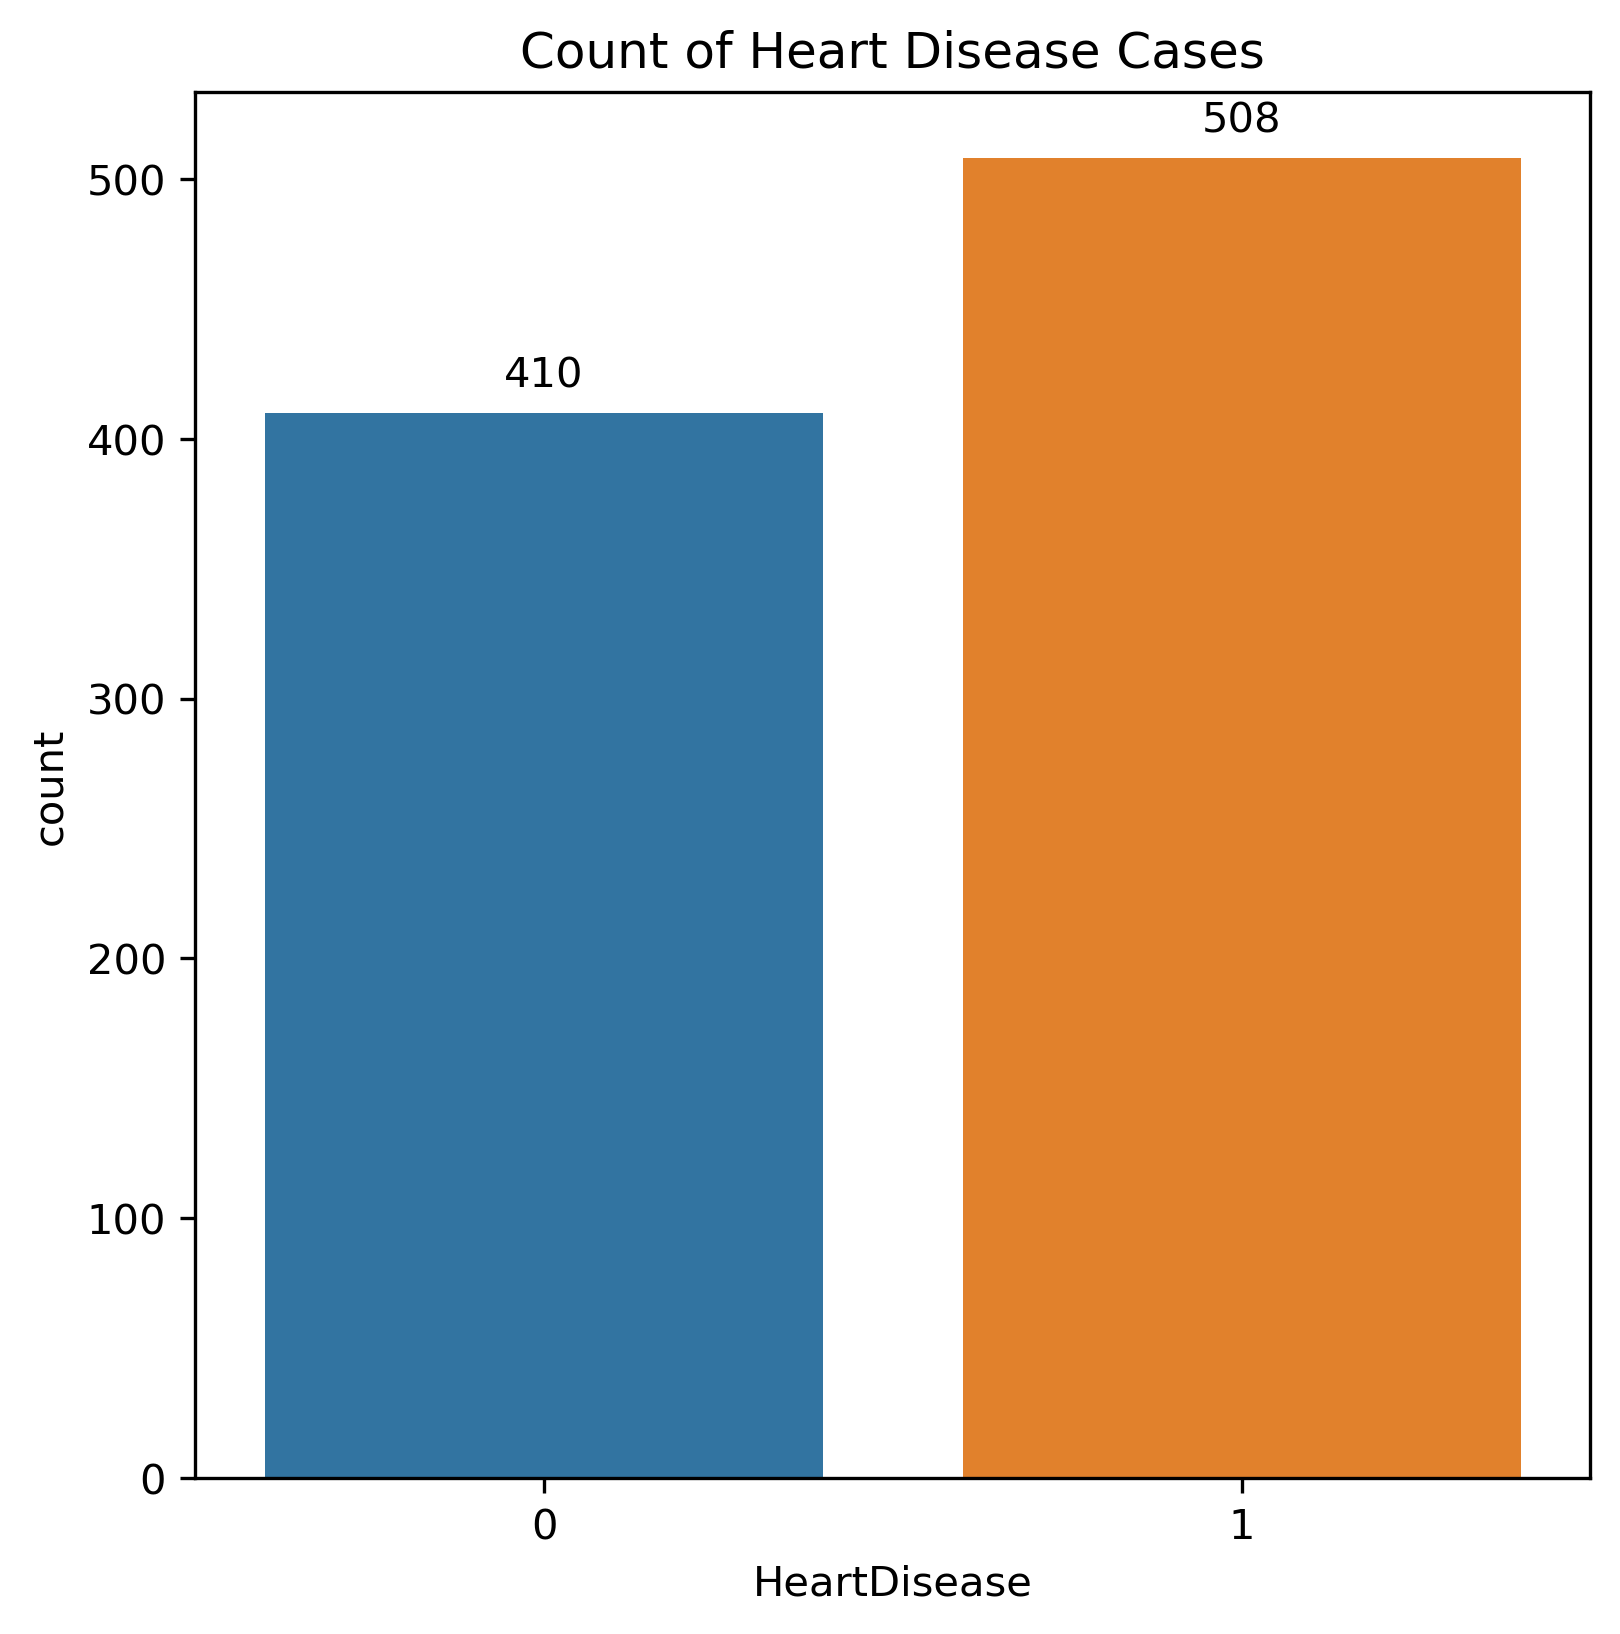

In [36]:
# Count of heart disease cases
plt.figure(figsize=(6,6),dpi=300)
ax = sns.countplot(x='HeartDsease', data=heart_faliure_data)
plt.title('Count of Heart Disease Cases')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.show()

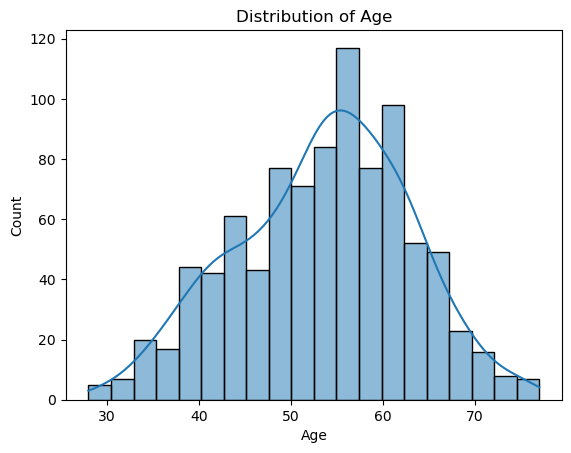

In [38]:
sns.histplot(x='Age', data=heart_faliure_data, kde=True, bins=20)
plt.title('Distribution of Age')
plt.show()

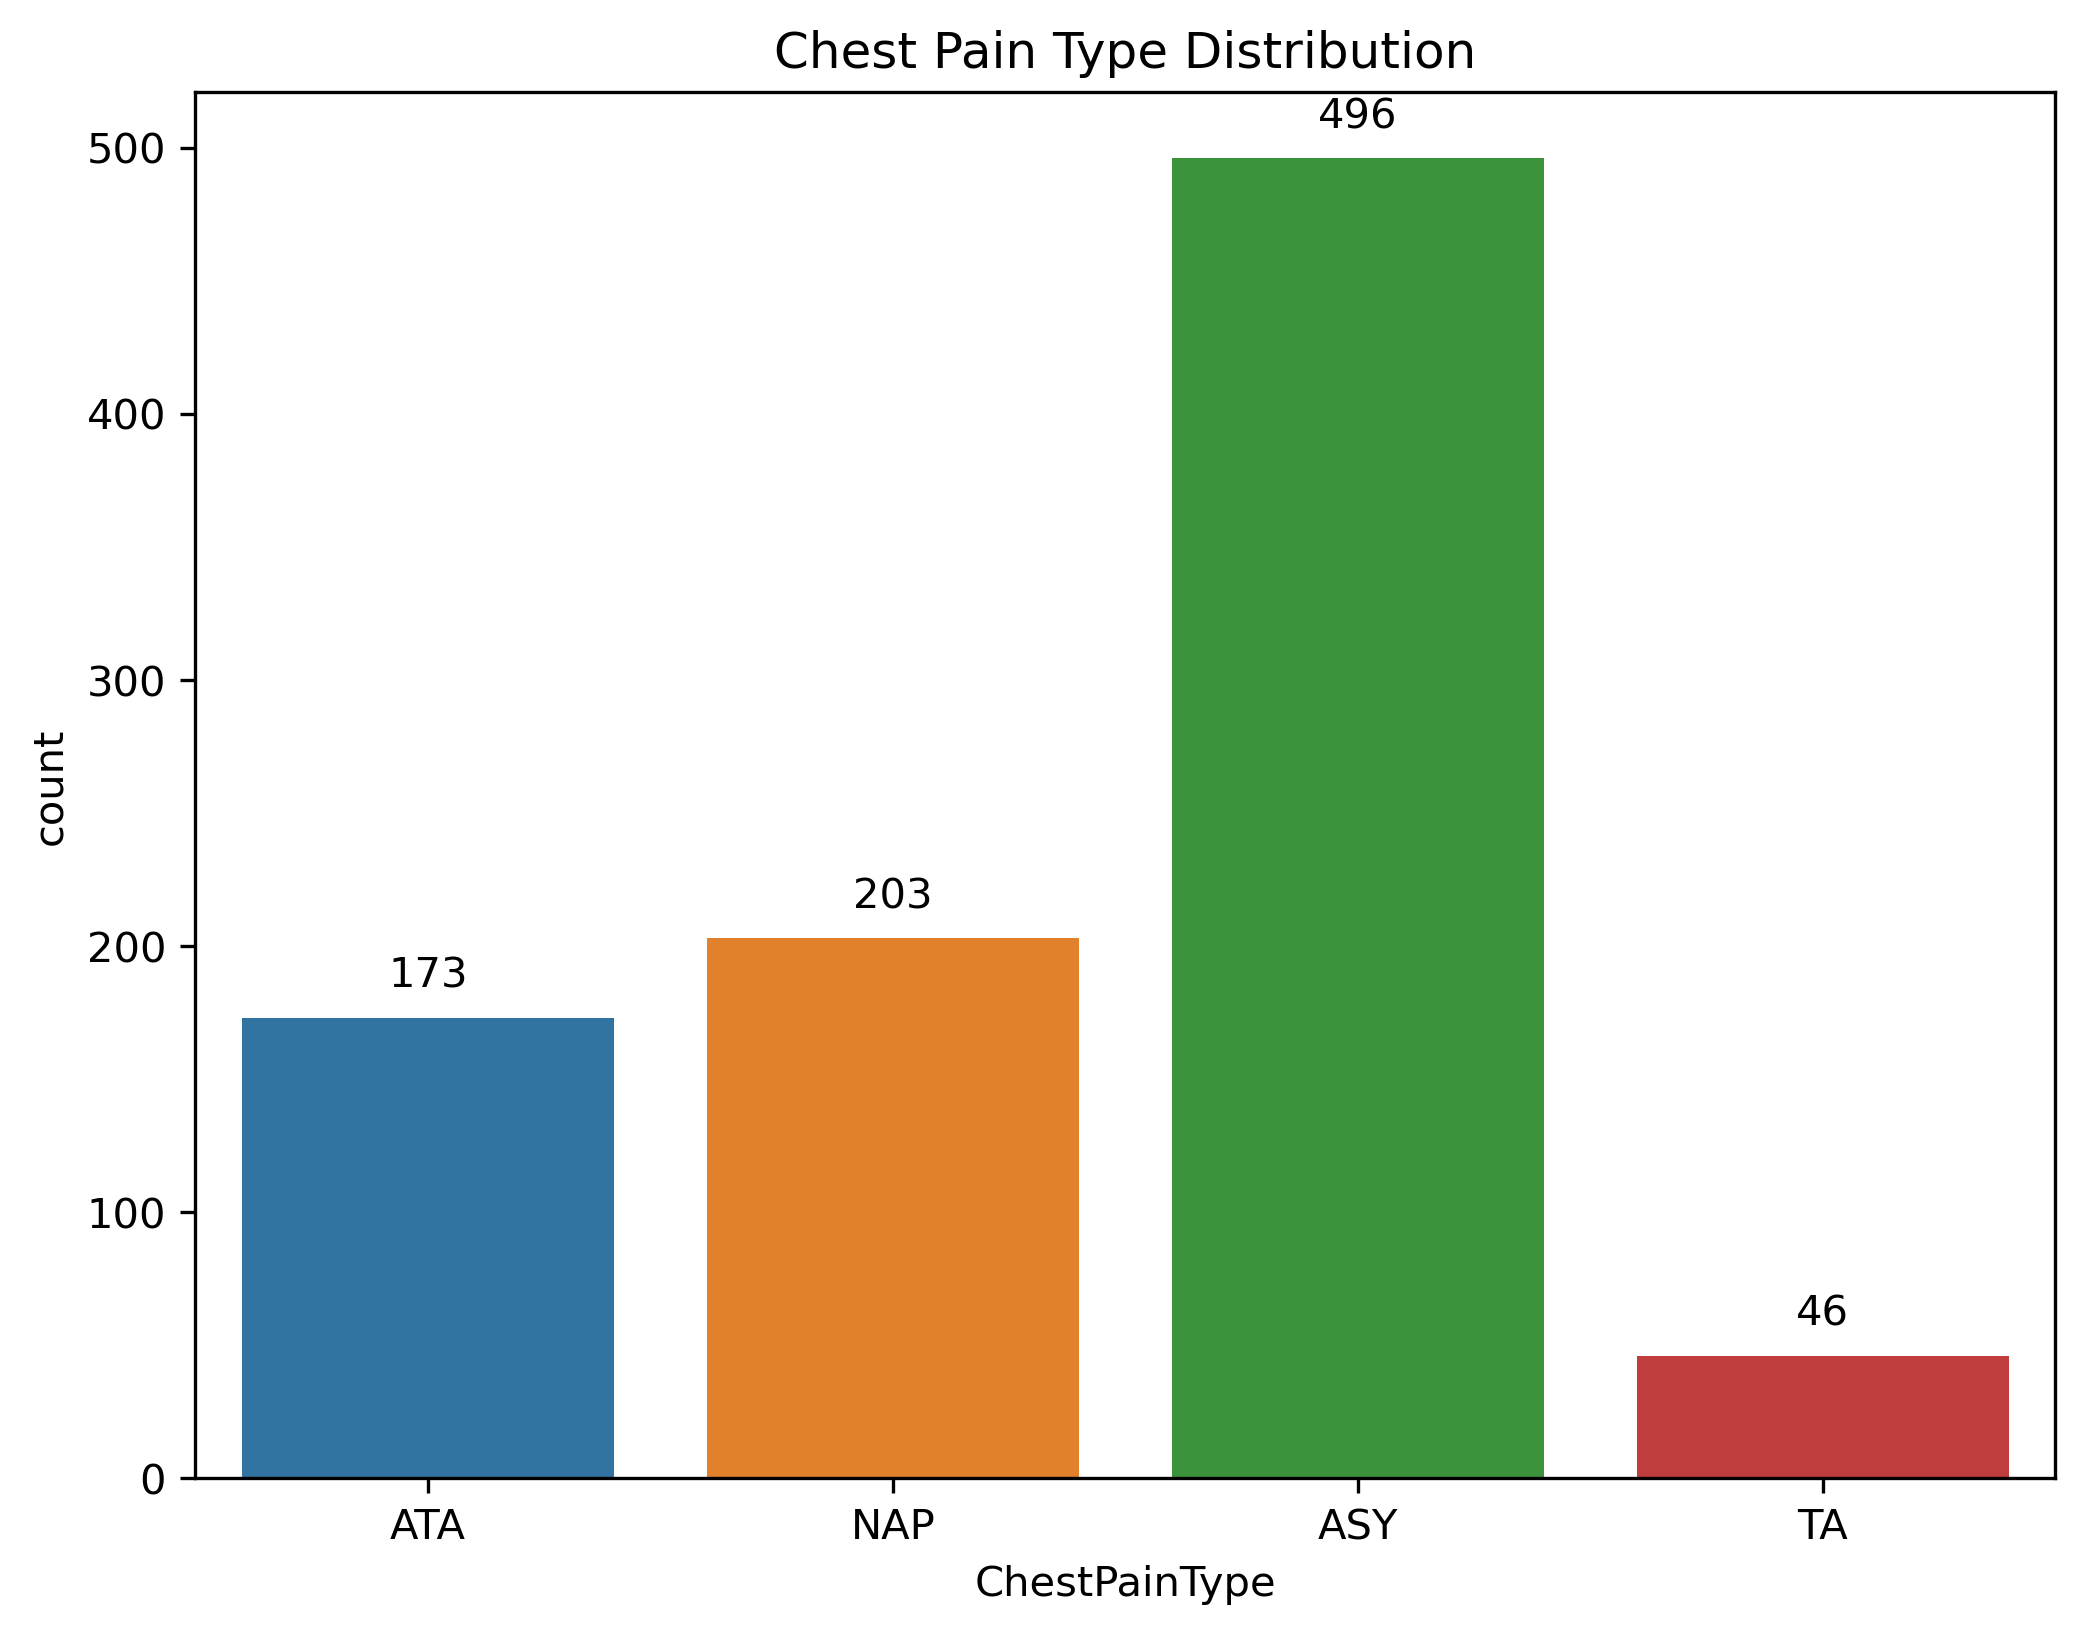

In [56]:
# Chest pain type distribution
plt.figure(figsize=(8, 6),dpi=300)
ax = sns.countplot(x='ChestPainType', data=df)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.title('Chest Pain Type Distribution')
plt.show()

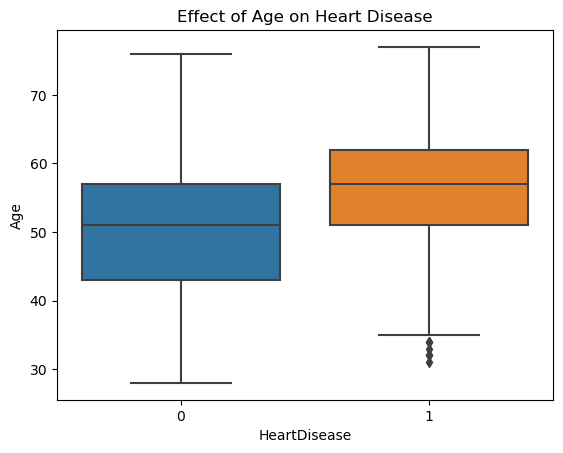

In [57]:
# Effect of Age on Heart Disease
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Effect of Age on Heart Disease')
plt.show()

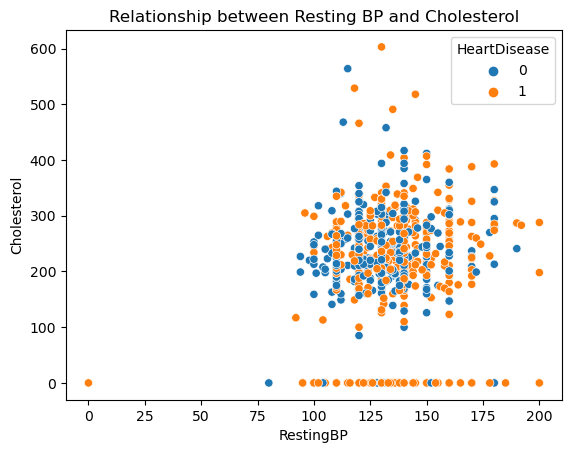

In [58]:

# Relationship between Resting Blood Pressure and Cholesterol
sns.scatterplot(x='RestingBP', y='Cholesterol', hue='HeartDisease', data=df)
plt.title('Relationship between Resting BP and Cholesterol')
plt.show()

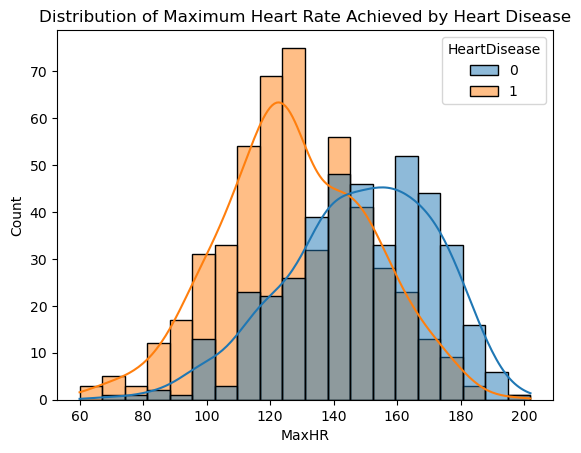

In [59]:
# Distribution of Maximum Heart Rate Achieved by Heart Disease Status
sns.histplot(x='MaxHR', hue='HeartDisease', data=df, kde=True, bins=20)
plt.title('Distribution of Maximum Heart Rate Achieved by Heart Disease')
plt.show()

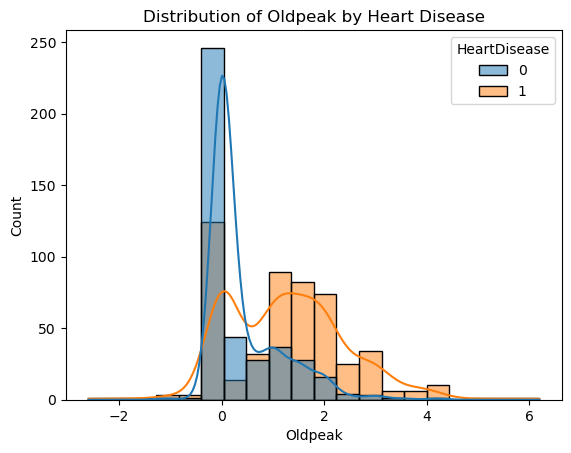

In [60]:
# Distribution of Oldpeak by Heart Disease Status
sns.histplot(x='Oldpeak', hue='HeartDisease', data=df, kde=True, bins=20)
plt.title('Distribution of Oldpeak by Heart Disease')
plt.show()

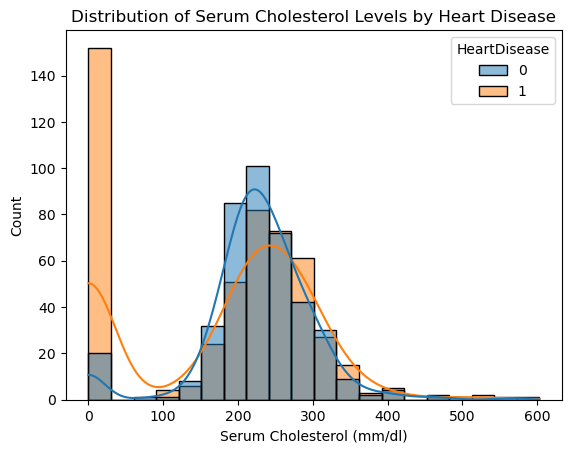

In [63]:
# Distribution of Serum Cholesterol Levels by Heart Disease Status
sns.histplot(x='Cholesterol', hue='HeartDisease', data=df, kde=True, bins=20)
plt.title('Distribution of Serum Cholesterol Levels by Heart Disease')
plt.xlabel('Serum Cholesterol (mm/dl)')
plt.show()

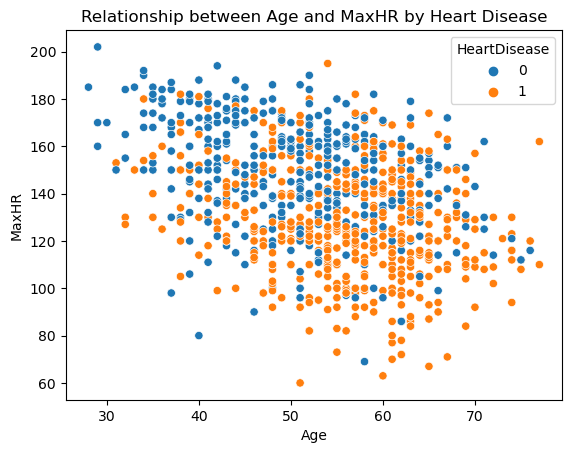

In [64]:
# Relationship between Age and Maximum Heart Rate Achieved by Heart Disease Status
sns.scatterplot(x='Age', y='MaxHR', hue='HeartDisease', data=df)
plt.title('Relationship between Age and MaxHR by Heart Disease')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
heart_faliure_data['ST_Slope'] = label_encoder.fit_transform(heart_faliure_data['ST_Slope'])

# One-Hot Encoding for nominal variables
heart_faliure_data = pd.get_dummies(heart_faliure_data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'])

***This looks to be a clean dataset without any missing values...***

In [9]:
heart_faliure_data.describe().T

count        mean         std   min     25%    50%    75%  \
Age                918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   
RestingBP          918.0  132.396514   18.514154   0.0  120.00  130.0  140.0   
Cholesterol        918.0  198.799564  109.384145   0.0  173.25  223.0  267.0   
FastingBS          918.0    0.233115    0.423046   0.0    0.00    0.0    0.0   
MaxHR              918.0  136.809368   25.460334  60.0  120.00  138.0  156.0   
Oldpeak            918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5   
ST_Slope           918.0    1.361656    0.607056   0.0    1.00    1.0    2.0   
HeartDisease       918.0    0.553377    0.497414   0.0    0.00    1.0    1.0   
Sex_F              918.0    0.210240    0.407701   0.0    0.00    0.0    0.0   
Sex_M              918.0    0.789760    0.407701   0.0    1.00    1.0    1.0   
ChestPainType_ASY  918.0    0.540305    0.498645   0.0    0.00    1.0    1.0   
ChestPainType_ATA  918.0    0.188453    0.391287   0.0    0.00    0.0    0.0   
ChestPainType_NAP  918.0    0.221133    0.415236   0.0    0.00    0.0    0.0   
ChestPainType_TA   918.0    0.050109    0.218289   0.0    0.00    0.0    0.0   
RestingECG_LVH     918.0    0.204793    0.403770   0.0    0.00    0.0    0.0   
RestingECG_Normal  918.0    0.601307    0.489896   0.0    0.00    1.0    1.0   
RestingECG_ST      918.0    0.193900    0.395567   0.0    0.00    0.0    0.0   
ExerciseAngina_N   918.0    0.595861    0.490992   0.0    0.00    1.0    1.0   
ExerciseAngina_Y   918.0    0.404139    0.490992   0.0    0.00    0.0    1.0   

                     max  
Age                 77.0  
RestingBP          200.0  
Cholesterol        603.0  
FastingBS            1.0  
MaxHR              202.0  
Oldpeak              6.2  
ST_Slope             2.0  
HeartDisease         1.0  
Sex_F                1.0  
Sex_M                1.0  
ChestPainType_ASY    1.0  
ChestPainType_ATA    1.0  
ChestPainType_NAP    1.0  
ChestPainType_TA     1.0  
RestingECG_LVH       1.0  
RestingECG_Normal    1.0  
RestingECG_ST        1.0  
ExerciseAngina_N     1.0  
ExerciseAngina_Y     1.0

In [10]:
heart_faliure_data.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ST_Slope  \
0   40        140          289          0    172      0.0         2   
1   49        160          180          0    156      1.0         1   
2   37        130          283          0     98      0.0         2   
3   48        138          214          0    108      1.5         1   
4   54        150          195          0    122      0.0         2   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  \
0             0      0      1                  0                  1   
1             1      1      0                  0                  0   
2             0      0      1                  0                  1   
3             1      1      0                  1                  0   
4             0      0      1                  0                  0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                  0                 0               0                  1   
1                  1                 0               0                  1   
2                  0                 0               0                  0   
3                  0                 0               0                  1   
4                  1                 0               0                  1   

   RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  
0              0                 1                 0  
1              0                 1                 0  
2              1                 1                 0  
3              0                 0                 1  
4              0                 1                 0

## Data Preparation

### Test - Train Split

In [13]:
X = heart_faliure_data.drop(columns=['HeartDisease'])
y = heart_faliure_data[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90, test_size = 0.10, random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (826, 18)
Y_Train Shape: (826, 1)
X_Test Shape: (92, 18)
Y_Test Shape: (92, 1)


#### Data Value Counts

In [14]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({1: 450, 0: 376})


In [19]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({1: 450, 0: 376})


In [16]:
data_features = dict(enumerate(X.columns))
data_features

{0: 'Age',
 1: 'RestingBP',
 2: 'Cholesterol',
 3: 'FastingBS',
 4: 'MaxHR',
 5: 'Oldpeak',
 6: 'ST_Slope',
 7: 'Sex_F',
 8: 'Sex_M',
 9: 'ChestPainType_ASY',
 10: 'ChestPainType_ATA',
 11: 'ChestPainType_NAP',
 12: 'ChestPainType_TA',
 13: 'RestingECG_LVH',
 14: 'RestingECG_Normal',
 15: 'RestingECG_ST',
 16: 'ExerciseAngina_N',
 17: 'ExerciseAngina_Y'}

### Data Normalization

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model Building & Training

To predict patients survival due to heart failure, we will train models from different machine learning algorithms. The classifiers to be used in this study will be -

**`1. Support Vector Machines with RBF kernel`**

**`2. Decision Tree`**

**`3. Random Forest`**

**`4. Gradient Boosting - XGBoost`**

**`5. Light GBM`**

## 1. Support Vector Machines with RBF kernel

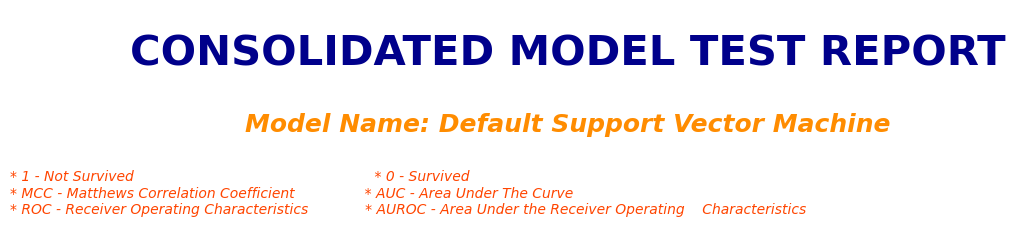

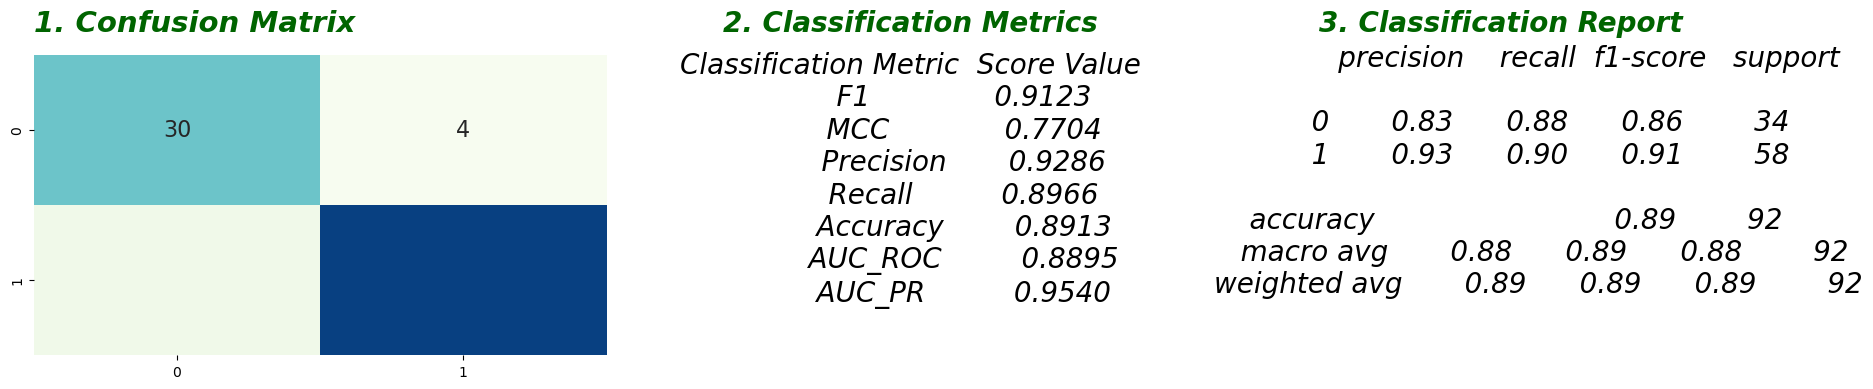

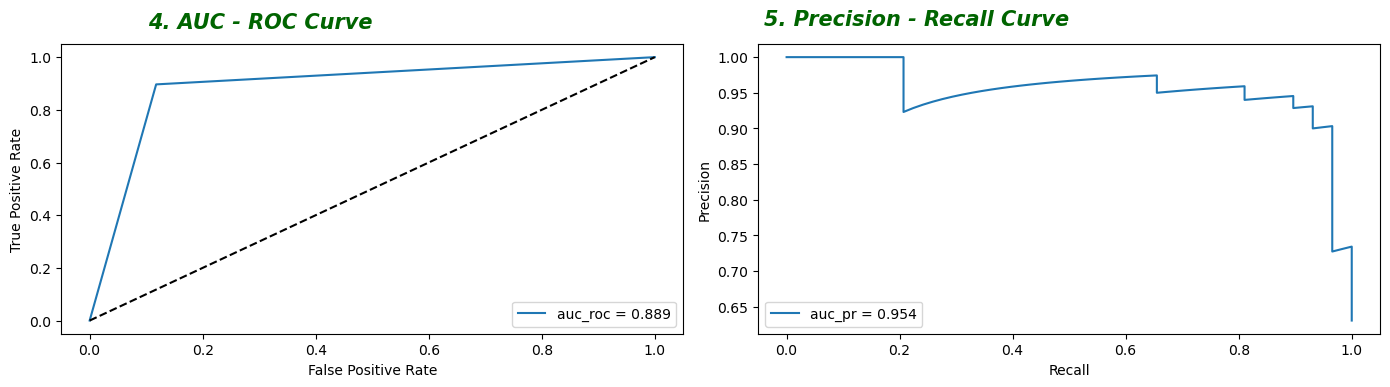

In [24]:
# SVM with Default Parameters and probability = True

svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

svm = svm.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(svm, X_test, y_test, model_name="Default Support Vector Machine")

### SVM Hyperparameters Tuning

In [25]:
# GridSearchCV to find best parameters for svm
svm = SVC(kernel = 'rbf', probability = True, random_state = 100)

# parameters to build the model on
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}  

grid_search = GridSearchCV(estimator = svm, param_grid = param_grid, 
                  scoring = 'accuracy', n_jobs = -1, cv = 5, verbose = 2)

# fitting the model for grid search 
grid_search.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", grid_search.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", grid_search.best_estimator_) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'C': 10, 'gamma': 0.01}

Best Classifier: SVC(C=10, gamma=0.01, probability=True, random_state=100)


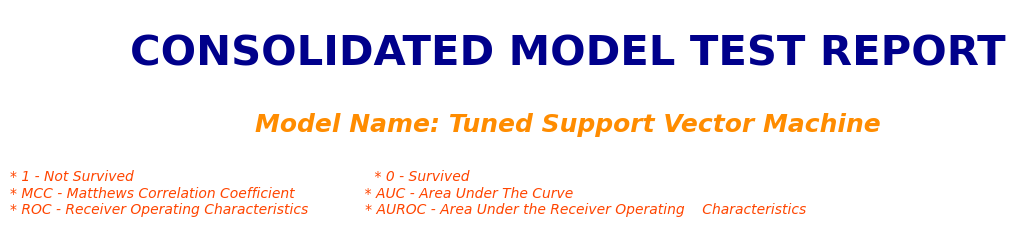

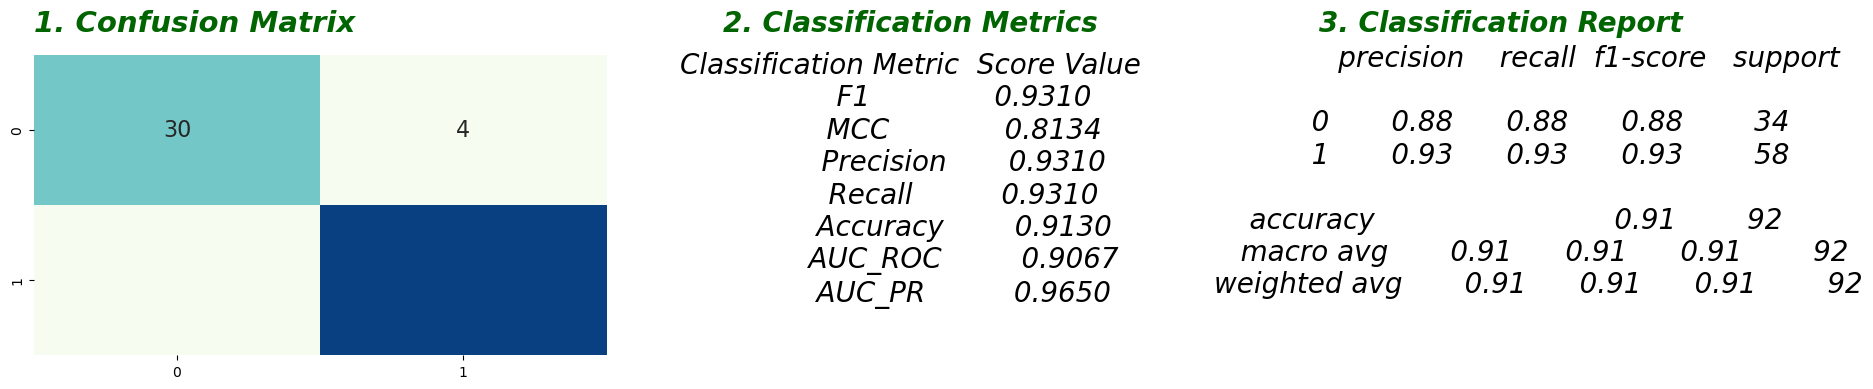

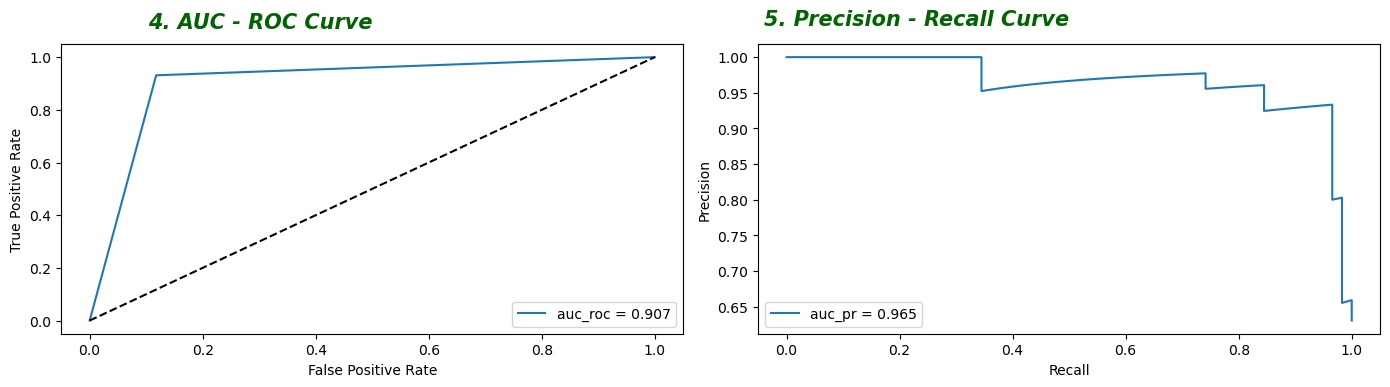

In [26]:
best_svc = grid_search.best_estimator_

best_svc.fit(X_train, y_train.values.ravel())


# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_svc, X_test, y_test, model_name="Tuned Support Vector Machine")

## 2. Decision Tree

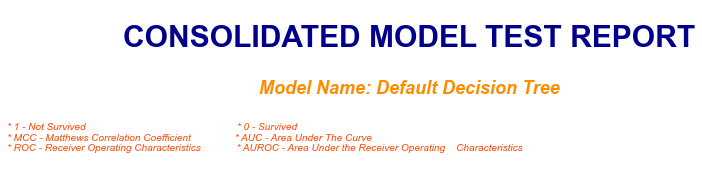

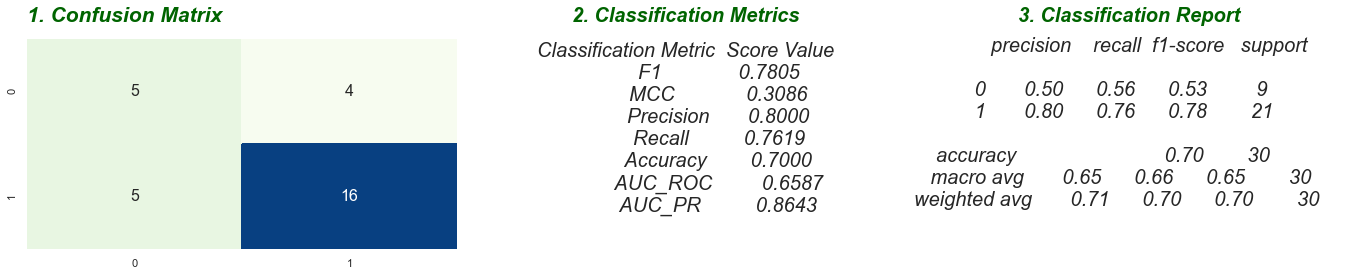

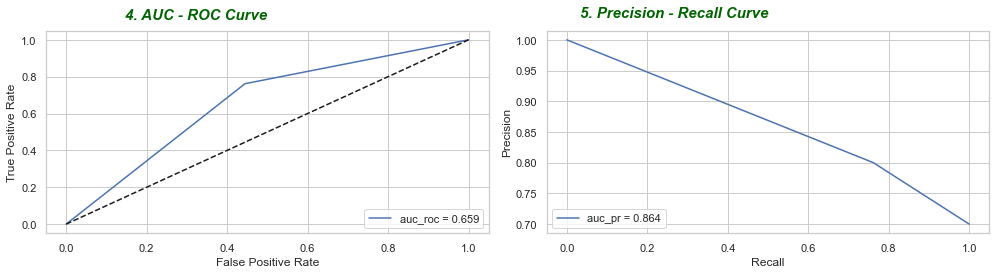

In [21]:
# Decision Tree with Default Parameters

tree = DecisionTreeClassifier(random_state = 100)

tree = tree.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(tree, X_test, y_test, model_name="Default Decision Tree")

### Decision Tree Hyperparameters Tuning

In [27]:
# GridSearchCV to find the optimal tree parameters
tree = DecisionTreeClassifier(random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 30), 
#               "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9),
              "min_samples_split":range(2, 10),
              "criterion": ["gini", "entropy"]}

# Instantiating RandomizedSearchCV object 
tree_grid = RandomizedSearchCV(tree, param_grid, cv = 5) 
    
# fitting the model for grid search 
tree_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", tree_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", tree_grid.best_estimator_) 

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 9}

Best Classifier: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=9, random_state=100)


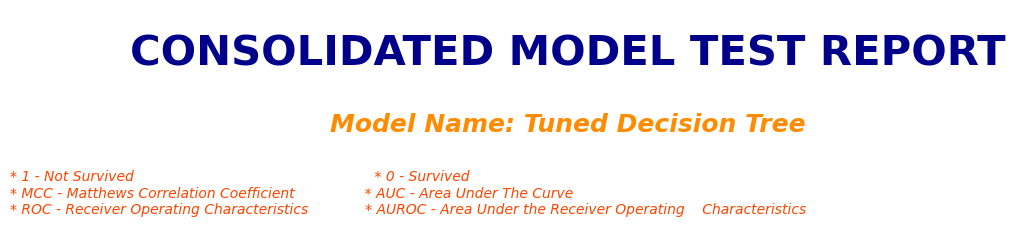

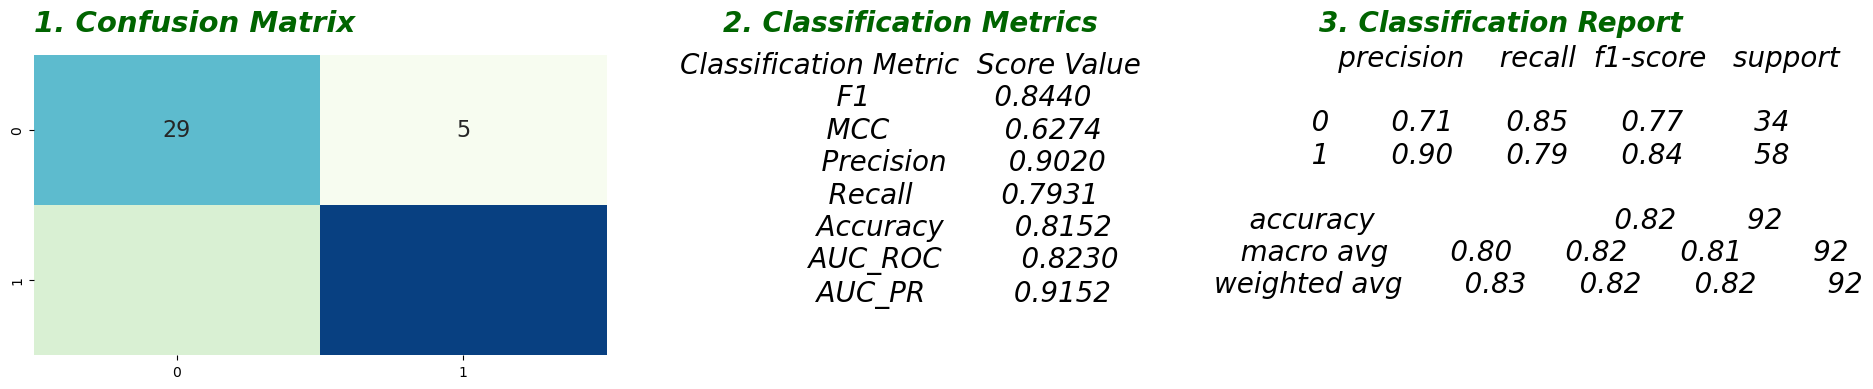

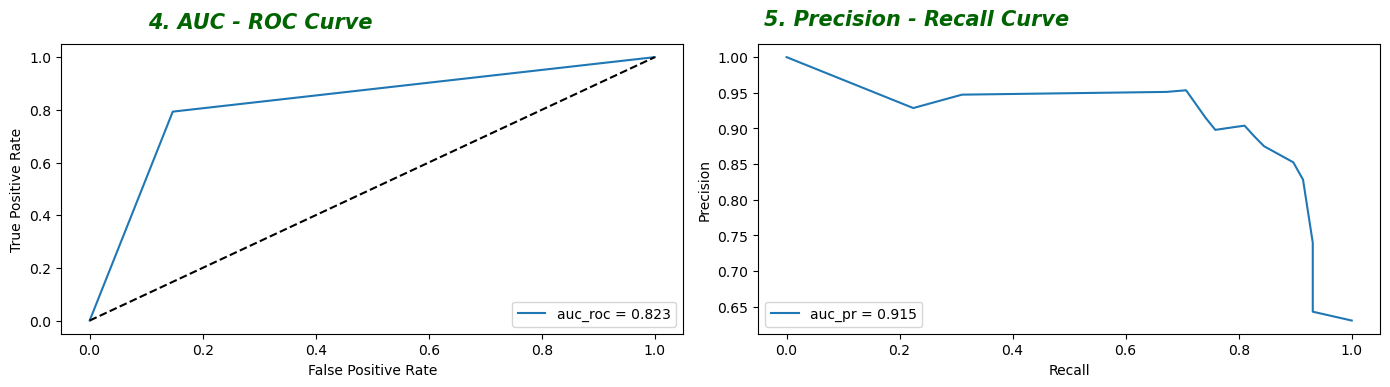

In [28]:
best_tree = tree_grid.best_estimator_

best_tree = best_tree.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_tree, X_test, y_test, model_name="Tuned Decision Tree")

## 3. Random Forest

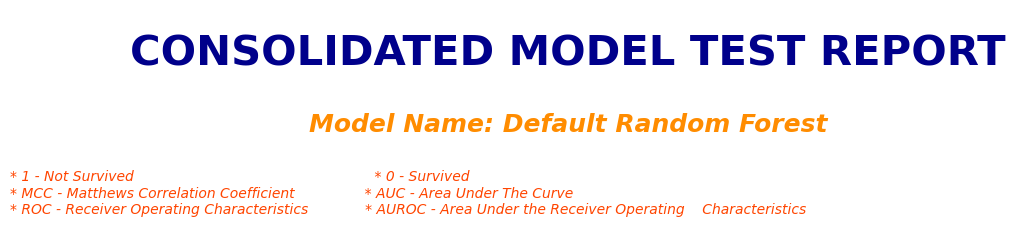

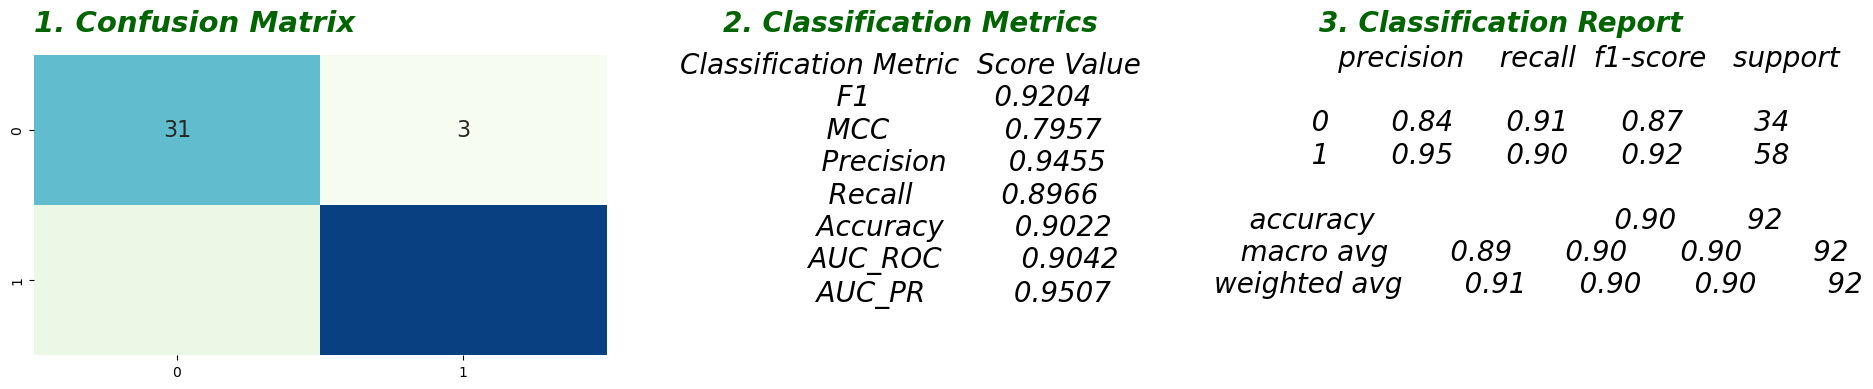

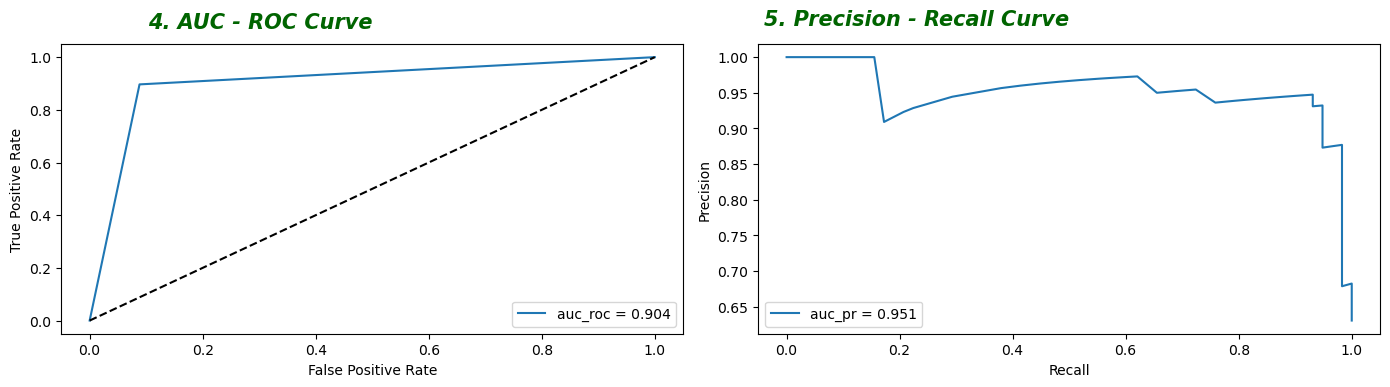

In [29]:
# Random Forest with Default Parameters
rfc = RandomForestClassifier(n_jobs = -1, random_state = 100)

rfc = rfc.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(rfc, X_test, y_test, model_name="Default Random Forest")

### Random Forest Hyperparameters Tuning

In [30]:
rn_forest = RandomForestClassifier(n_jobs = -1, random_state = 100)

# parameters to build the model on
param_grid = {"max_depth": range(1, 10), 
#               "max_features": randint(1, 3), 
              "min_samples_leaf": randint(25, 50),
              "min_samples_split":range(50, 100, 2),
              "n_estimators": range(1000, 8000, 500),
              "bootstrap": [True, False]}

# Instantiating RandomizedSearchCV object 
forest_grid = RandomizedSearchCV(rn_forest, param_grid, cv = 5) 
    
# fitting the model for grid search 
forest_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", forest_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", forest_grid.best_estimator_) 

Best Parameters: {'bootstrap': False, 'max_depth': 5, 'min_samples_leaf': 44, 'min_samples_split': 96, 'n_estimators': 2500}

Best Classifier: RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=44,
                       min_samples_split=96, n_estimators=2500, n_jobs=-1,
                       random_state=100)


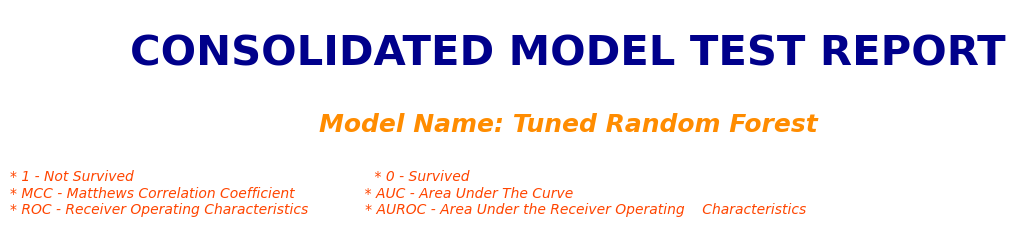

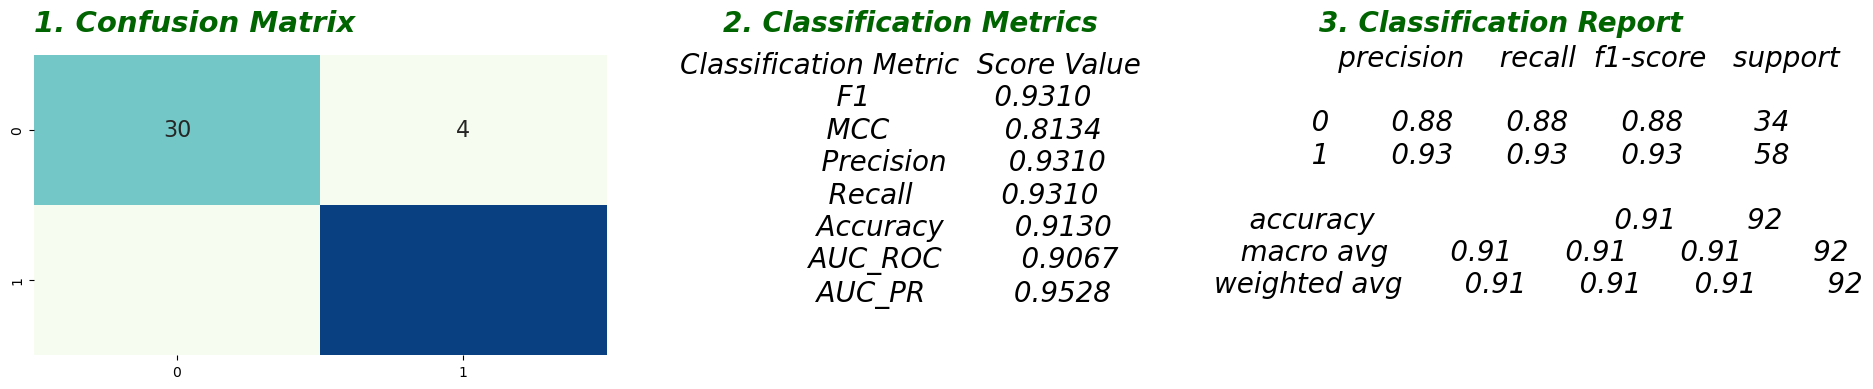

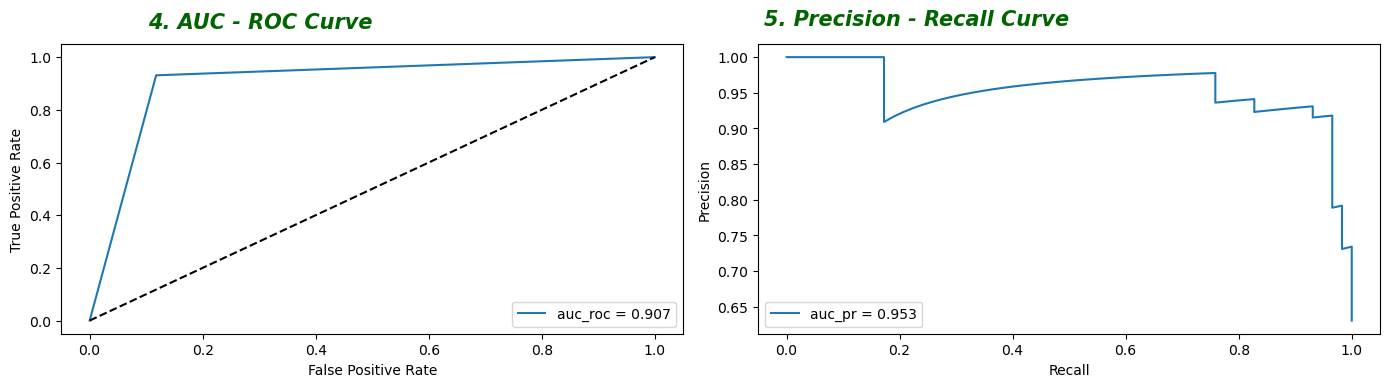

In [47]:
# Random Forest with Best Hypertuned Parameters
best_forest = forest_grid.best_estimator_

best_forest = best_forest.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_forest, X_test, y_test, model_name="Tuned Random Forest")

## 4. Extreme Gradient Boosting - XGBoost

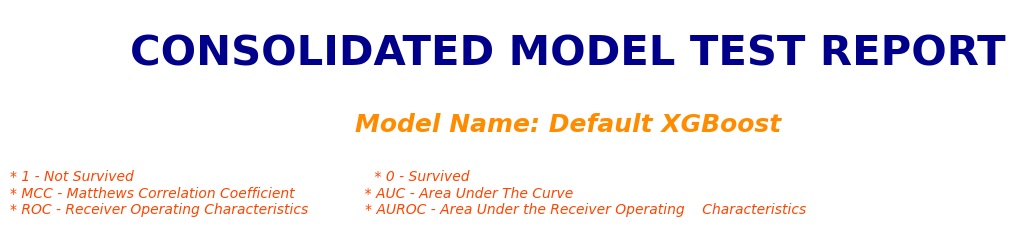

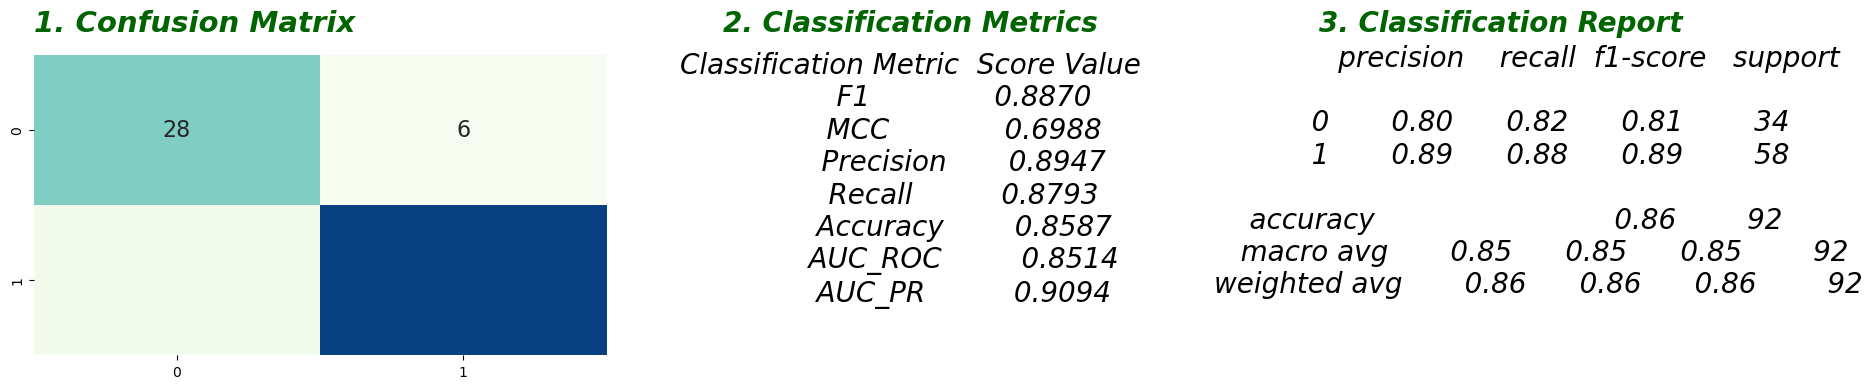

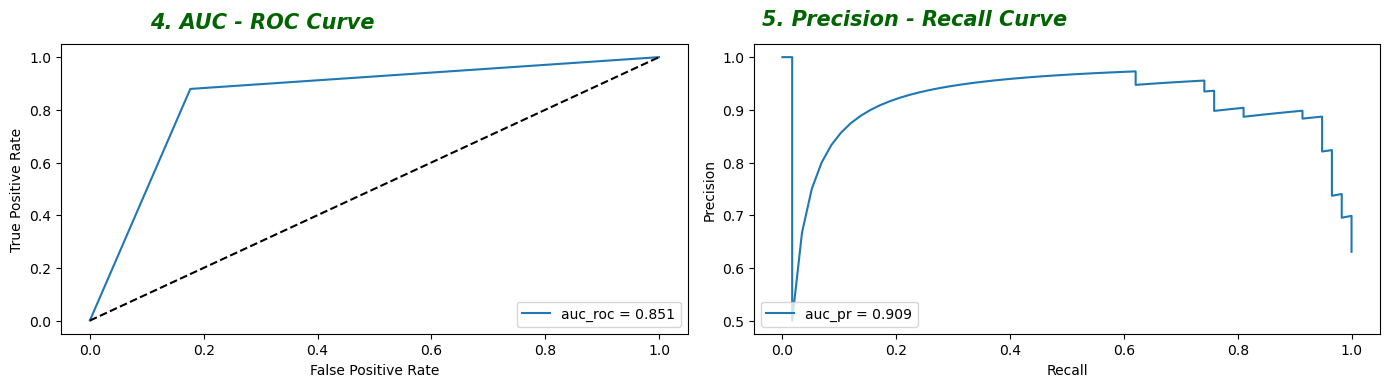

In [48]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

xgb = xgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(xgb, X_test, y_test, model_name="Default XGBoost")

In [49]:
# utils.plot_model_feature_importances(X_train, model = xgb)
xgb.feature_importances_

array([0.01981965, 0.02171944, 0.02741155, 0.05483288, 0.0209335 ,
       0.03230114, 0.42324403, 0.04724528, 0.        , 0.113824  ,
       0.02214031, 0.0112784 , 0.06877776, 0.03197398, 0.00812625,
       0.04323921, 0.0531327 , 0.        ], dtype=float32)

### XG Boost Hyperparameters Tuning

In [50]:
# XGBoost with Default Parameters
xgb = XGBClassifier(n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
             'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.6, 0.9, 0.95, 0.99],
             'n_estimators': range(100, 1100, 100),
             'min_child_weight': range(1, 11),
             'subsample': np.arange(0.1, 1.1, 0.1),
             'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
xgb_grid = RandomizedSearchCV(xgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
xgb_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", xgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", xgb_grid.best_estimator_)

Best Parameters: {'subsample': 0.7000000000000001, 'n_estimators': 600, 'min_child_weight': 7, 'max_depth': 25, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Best Classifier: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=-1,
              num_parallel_tree=None, random_state=100, ...)


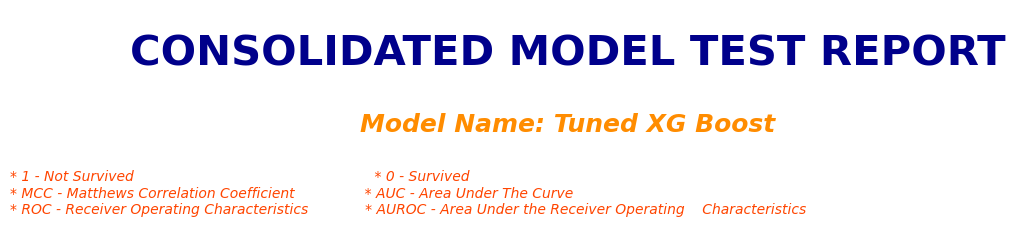

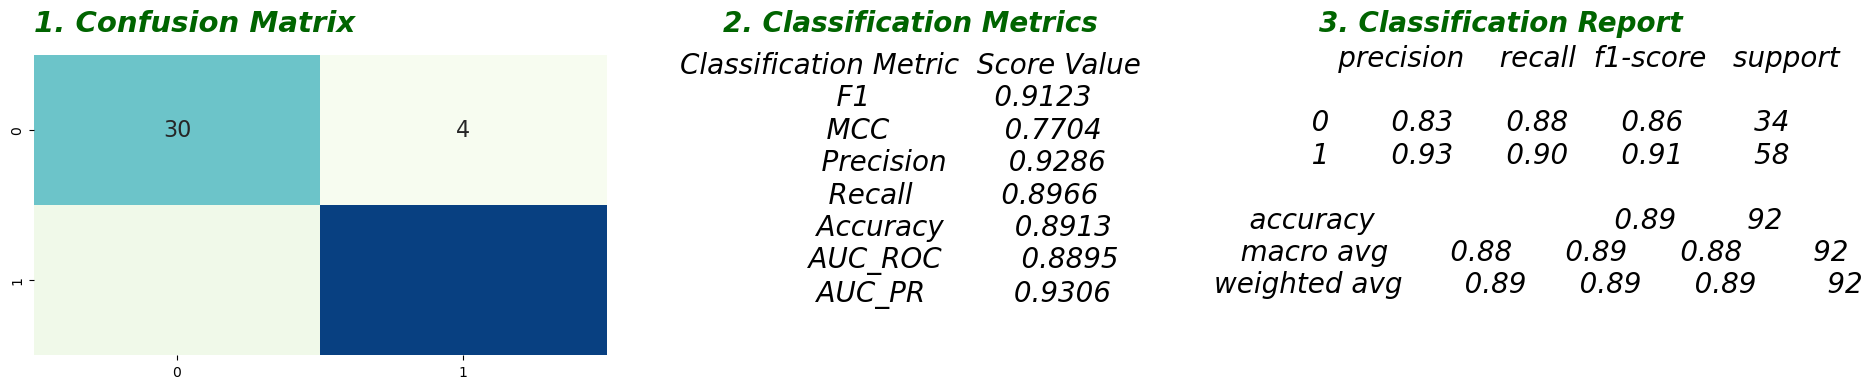

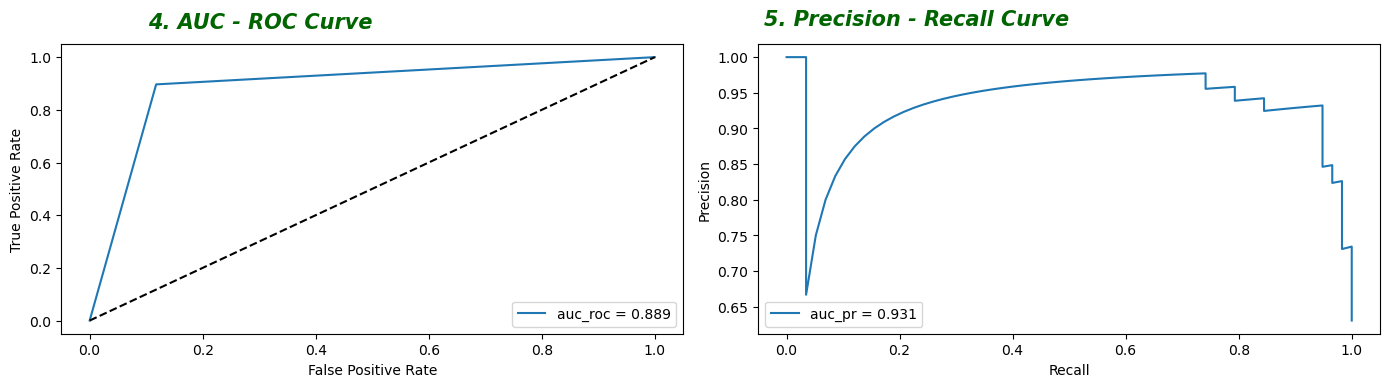

In [51]:
# XG Boost with Best Hypertuned Parameters
best_xgb = xgb_grid.best_estimator_

best_xgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_xgb, X_test, y_test, model_name="Tuned XG Boost")

## 5. Light Gradient Boosted Machine (Light GBM)

[LightGBM] [Info] Number of positive: 450, number of negative: 376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544794 -> initscore=0.179658
[LightGBM] [Info] Start training from score 0.179658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


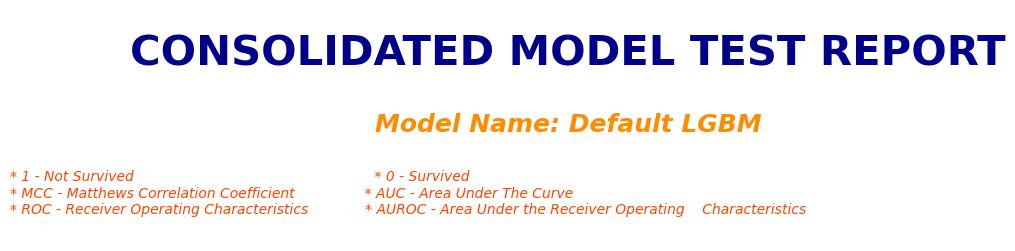

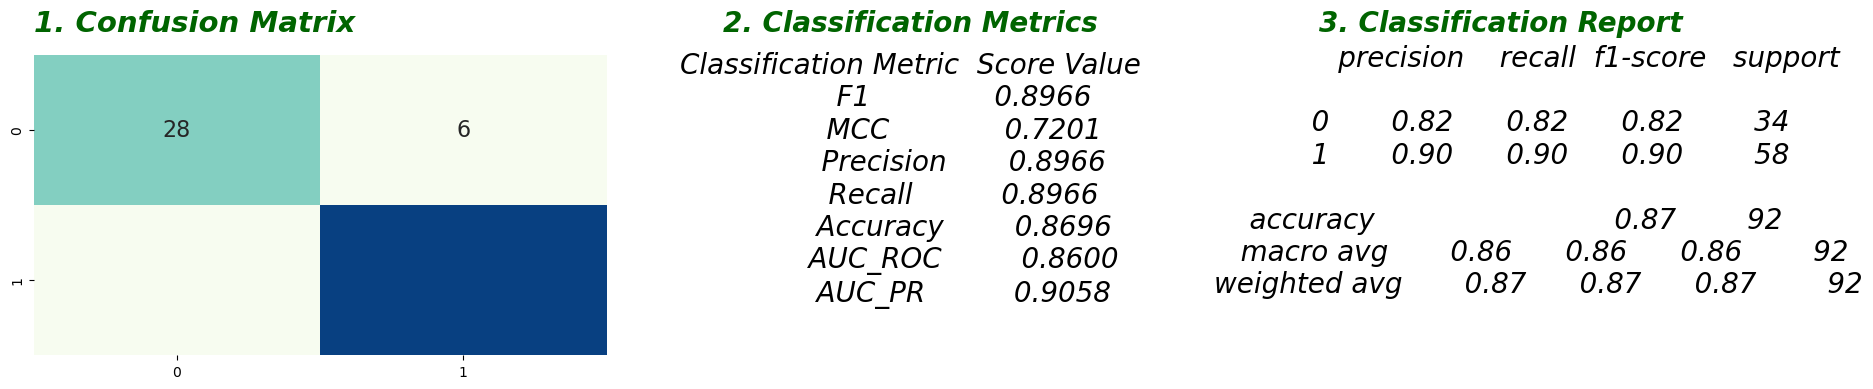

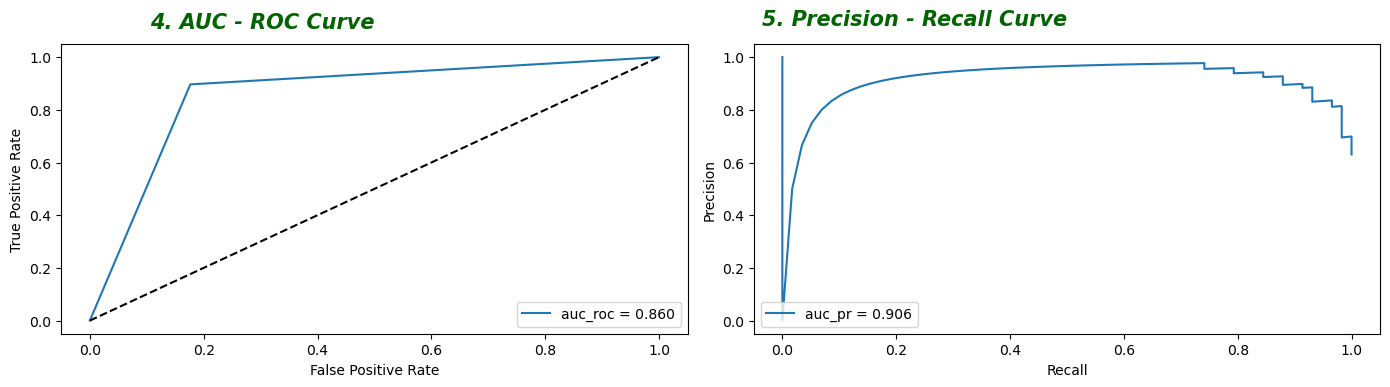

In [52]:
# LightGBM with Default Parameters
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

lgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(lgb, X_test, y_test, model_name="Default LGBM")

### LGBM Hyperparameter Tuning

In [53]:
# LGBM with Default Parameters
lgb = LGBMClassifier(objective = 'binary', n_jobs = -1, random_state = 100)

param_grid = {'max_depth': range(4, 40),
              'num_leaves': range(20, 100),
              'learning_rate': np.arange(0.1, 1.0, 0.1),
              'n_estimators': range(100, 1100, 100),
              'min_child_samples': range(1, 72),
              'subsample': np.arange(0.1, 1.1, 0.1),
              'colsample_bytree': np.arange(0.1, 1.1, 0.1)}

# Instantiating RandomizedSearchCV object 
lgb_grid= RandomizedSearchCV(lgb, param_grid, cv = 5) 
    
# fitting the model for grid search 
lgb_grid = lgb_grid.fit(X_train, y_train.values.ravel())
    
# get the best parameter from gird search 
print("Best Parameters:", lgb_grid.best_params_) 
  
# get the best classifier model after hyper-parameter tuning 
print("\nBest Classifier:", lgb_grid.best_estimator_)

[LightGBM] [Info] Number of positive: 360, number of negative: 300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 660, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.545455 -> initscore=0.182322
[LightGBM] [Info] Start training from score 0.182322
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Info] Number of positive: 450, number of negative: 376
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 406
[LightGBM] [Info] Number of data points in the train set: 826, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544794 -> initscore=0.179658
[LightGBM] [Info] Start training from score 0.179658
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

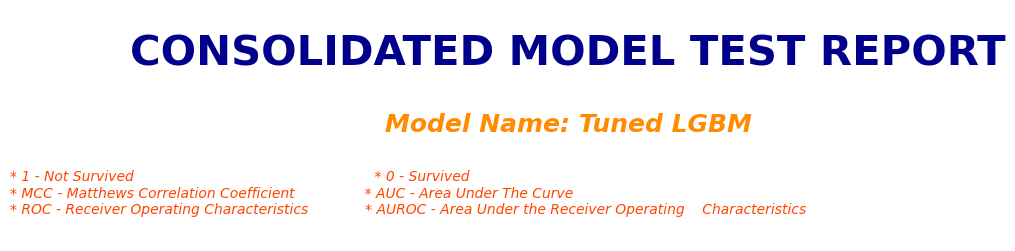

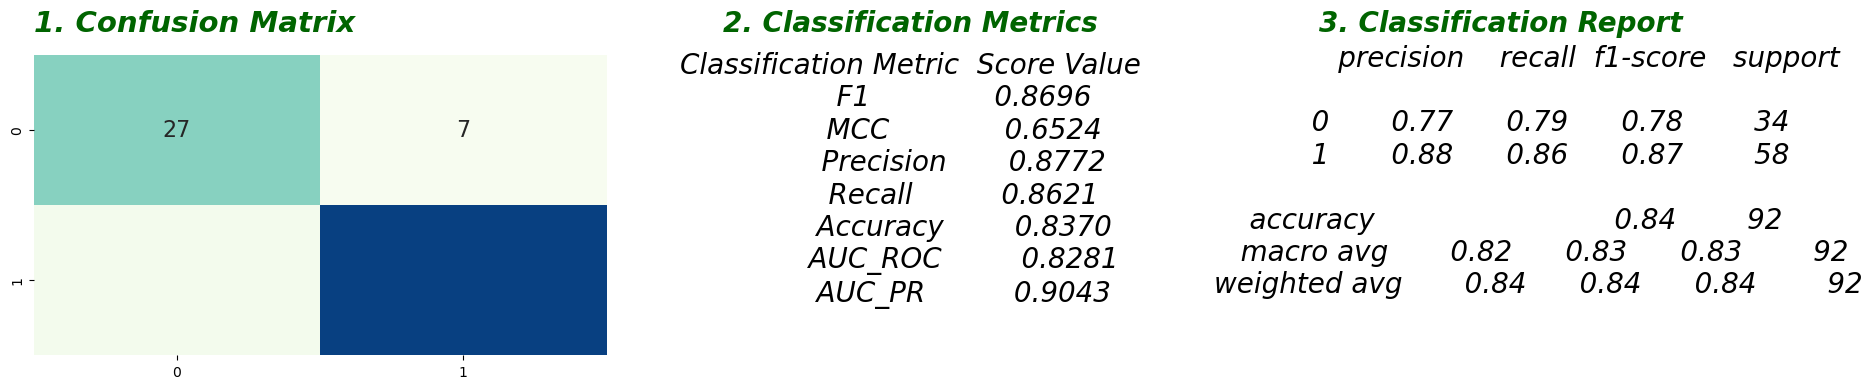

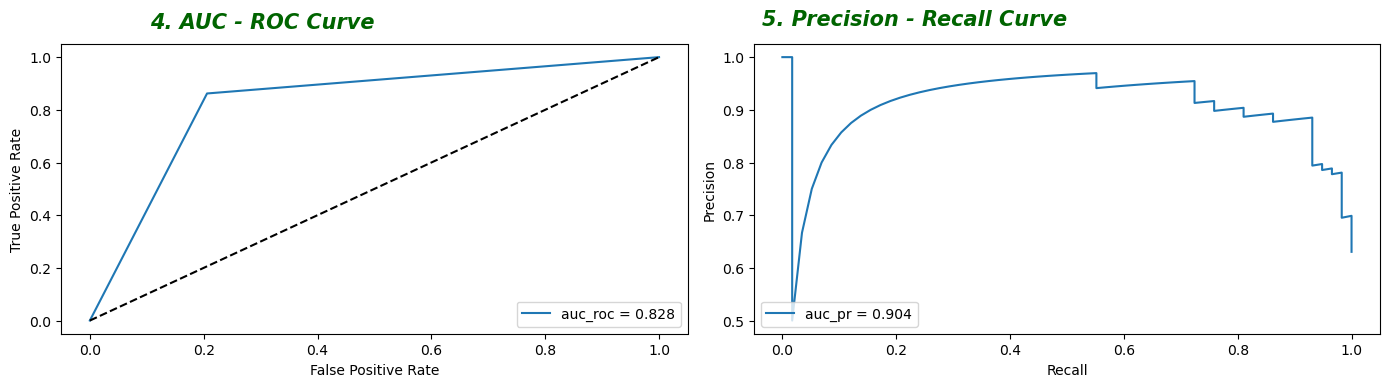

In [54]:
# LGBM with Best Hypertuned Parameters
best_lgb = lgb_grid.best_estimator_

best_lgb.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_lgb, X_test, y_test, model_name="Tuned LGBM")

In [65]:
# Import the required libraries & modules
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from ReusableUtils import ReusableUtils
utils = ReusableUtils()

from SurvivalAnalysisUtils import KaplanMeierUtils
kmUtils = KaplanMeierUtils()

In [75]:
import pandas as pd

# Load your dataset
df = pd.read_csv('heart.csv')

# Specify categorical and continuous columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Separate the data based on column types
categorical_data = df[categorical_columns]
continuous_data = df[continuous_columns]

print("Categorical Data:")
print(categorical_data.head())

print("\nContinuous Data:")
print(continuous_data.head())


Categorical Data:
  Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0   M           ATA          0     Normal              N       Up   
1   F           NAP          0     Normal              N     Flat   
2   M           ATA          0         ST              N       Up   
3   F           ASY          0     Normal              Y     Flat   
4   M           NAP          0     Normal              N       Up   

   HeartDisease  
0             0  
1             1  
2             0  
3             1  
4             0  

Continuous Data:
   Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0   40        140          289    172      0.0
1   49        160          180    156      1.0
2   37        130          283     98      0.0
3   48        138          214    108      1.5
4   54        150          195    122      0.0


In [83]:
correlation_matrix = heart_faliure_data[covariates].corr()
print(correlation_matrix)


                        Age     Sex_F     Sex_M  ChestPainType_ASY  \
Age                1.000000 -0.055750  0.055750           0.166607   
Sex_F             -0.055750  1.000000 -1.000000          -0.183876   
Sex_M              0.055750 -1.000000  1.000000           0.183876   
ChestPainType_ASY  0.166607 -0.183876  0.183876           1.000000   
ChestPainType_ATA -0.218165  0.161522 -0.161522          -0.522432   
ChestPainType_NAP -0.011335  0.066486 -0.066486          -0.577670   
ChestPainType_TA   0.032042  0.004031 -0.004031          -0.249003   
RestingBP          0.254399 -0.005133  0.005133           0.048824   
Cholesterol       -0.095282  0.200092 -0.200092          -0.120531   
FastingBS          0.198039 -0.120076  0.120076           0.131176   
MaxHR             -0.382045  0.189186 -0.189186          -0.354963   
Oldpeak            0.258612 -0.105734  0.105734           0.280026   
ST_Slope          -0.268264  0.150693 -0.150693          -0.336411   
RestingECG_LVH     0

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
heart_faliure_data[continuous_columns] = scaler.fit_transform(heart_faliure_data[continuous_columns])


In [85]:
print(heart_faliure_data.isnull().sum())


Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
ST_Slope             0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
time                 0
event                0
dtype: int64


In [ ]:


# Compute the expected lifetime
expected_lifetime = cph.predict_median(new_data)
print(f"Expected Lifetime (E[T]) for the specified covariates: {expected_lifetime}")


In [86]:
print(heart_faliure_data['event'].value_counts())


1    508
0    410
Name: event, dtype: int64


In [87]:
# Try fitting with fewer variables
cph.fit(heart_faliure_data[['Age', 'RestingBP', 'Cholesterol', 'event', 'time']], duration_col='time', event_col='event')


<lifelines.CoxPHFitter: fitted with 918 total observations, 410 right-censored observations>

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Preparing data for modeling
X = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]  # Select relevant features
y = df['HeartDisease']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[54 23]
 [29 78]]
              precision    recall  f1-score   support

           0       0.65      0.70      0.67        77
           1       0.77      0.73      0.75       107

    accuracy                           0.72       184
   macro avg       0.71      0.72      0.71       184
weighted avg       0.72      0.72      0.72       184



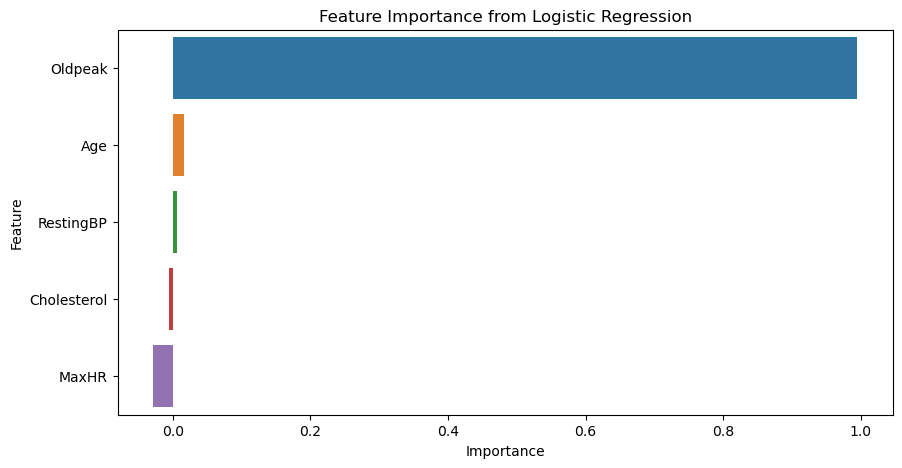

In [90]:
# Feature importance
importance = model.coef_[0]
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Plotting feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance from Logistic Regression')
plt.show()


In [91]:
pip install lifelines


Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('heart.csv')
# Create a new DataFrame for survival analysis
# Here, Age is treated as time and HeartDisease as event
survival_data = df[['Age', 'HeartDisease']]
survival_data.rename(columns={'Age': 'time', 'HeartDisease': 'event'}, inplace=True)


<IPython.core.display.Javascript object>

C:\Users\Grace\AppData\Local\Temp\ipykernel_20556\4006146166.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survival_data.rename(columns={'Age': 'time', 'HeartDisease': 'event'}, inplace=True)


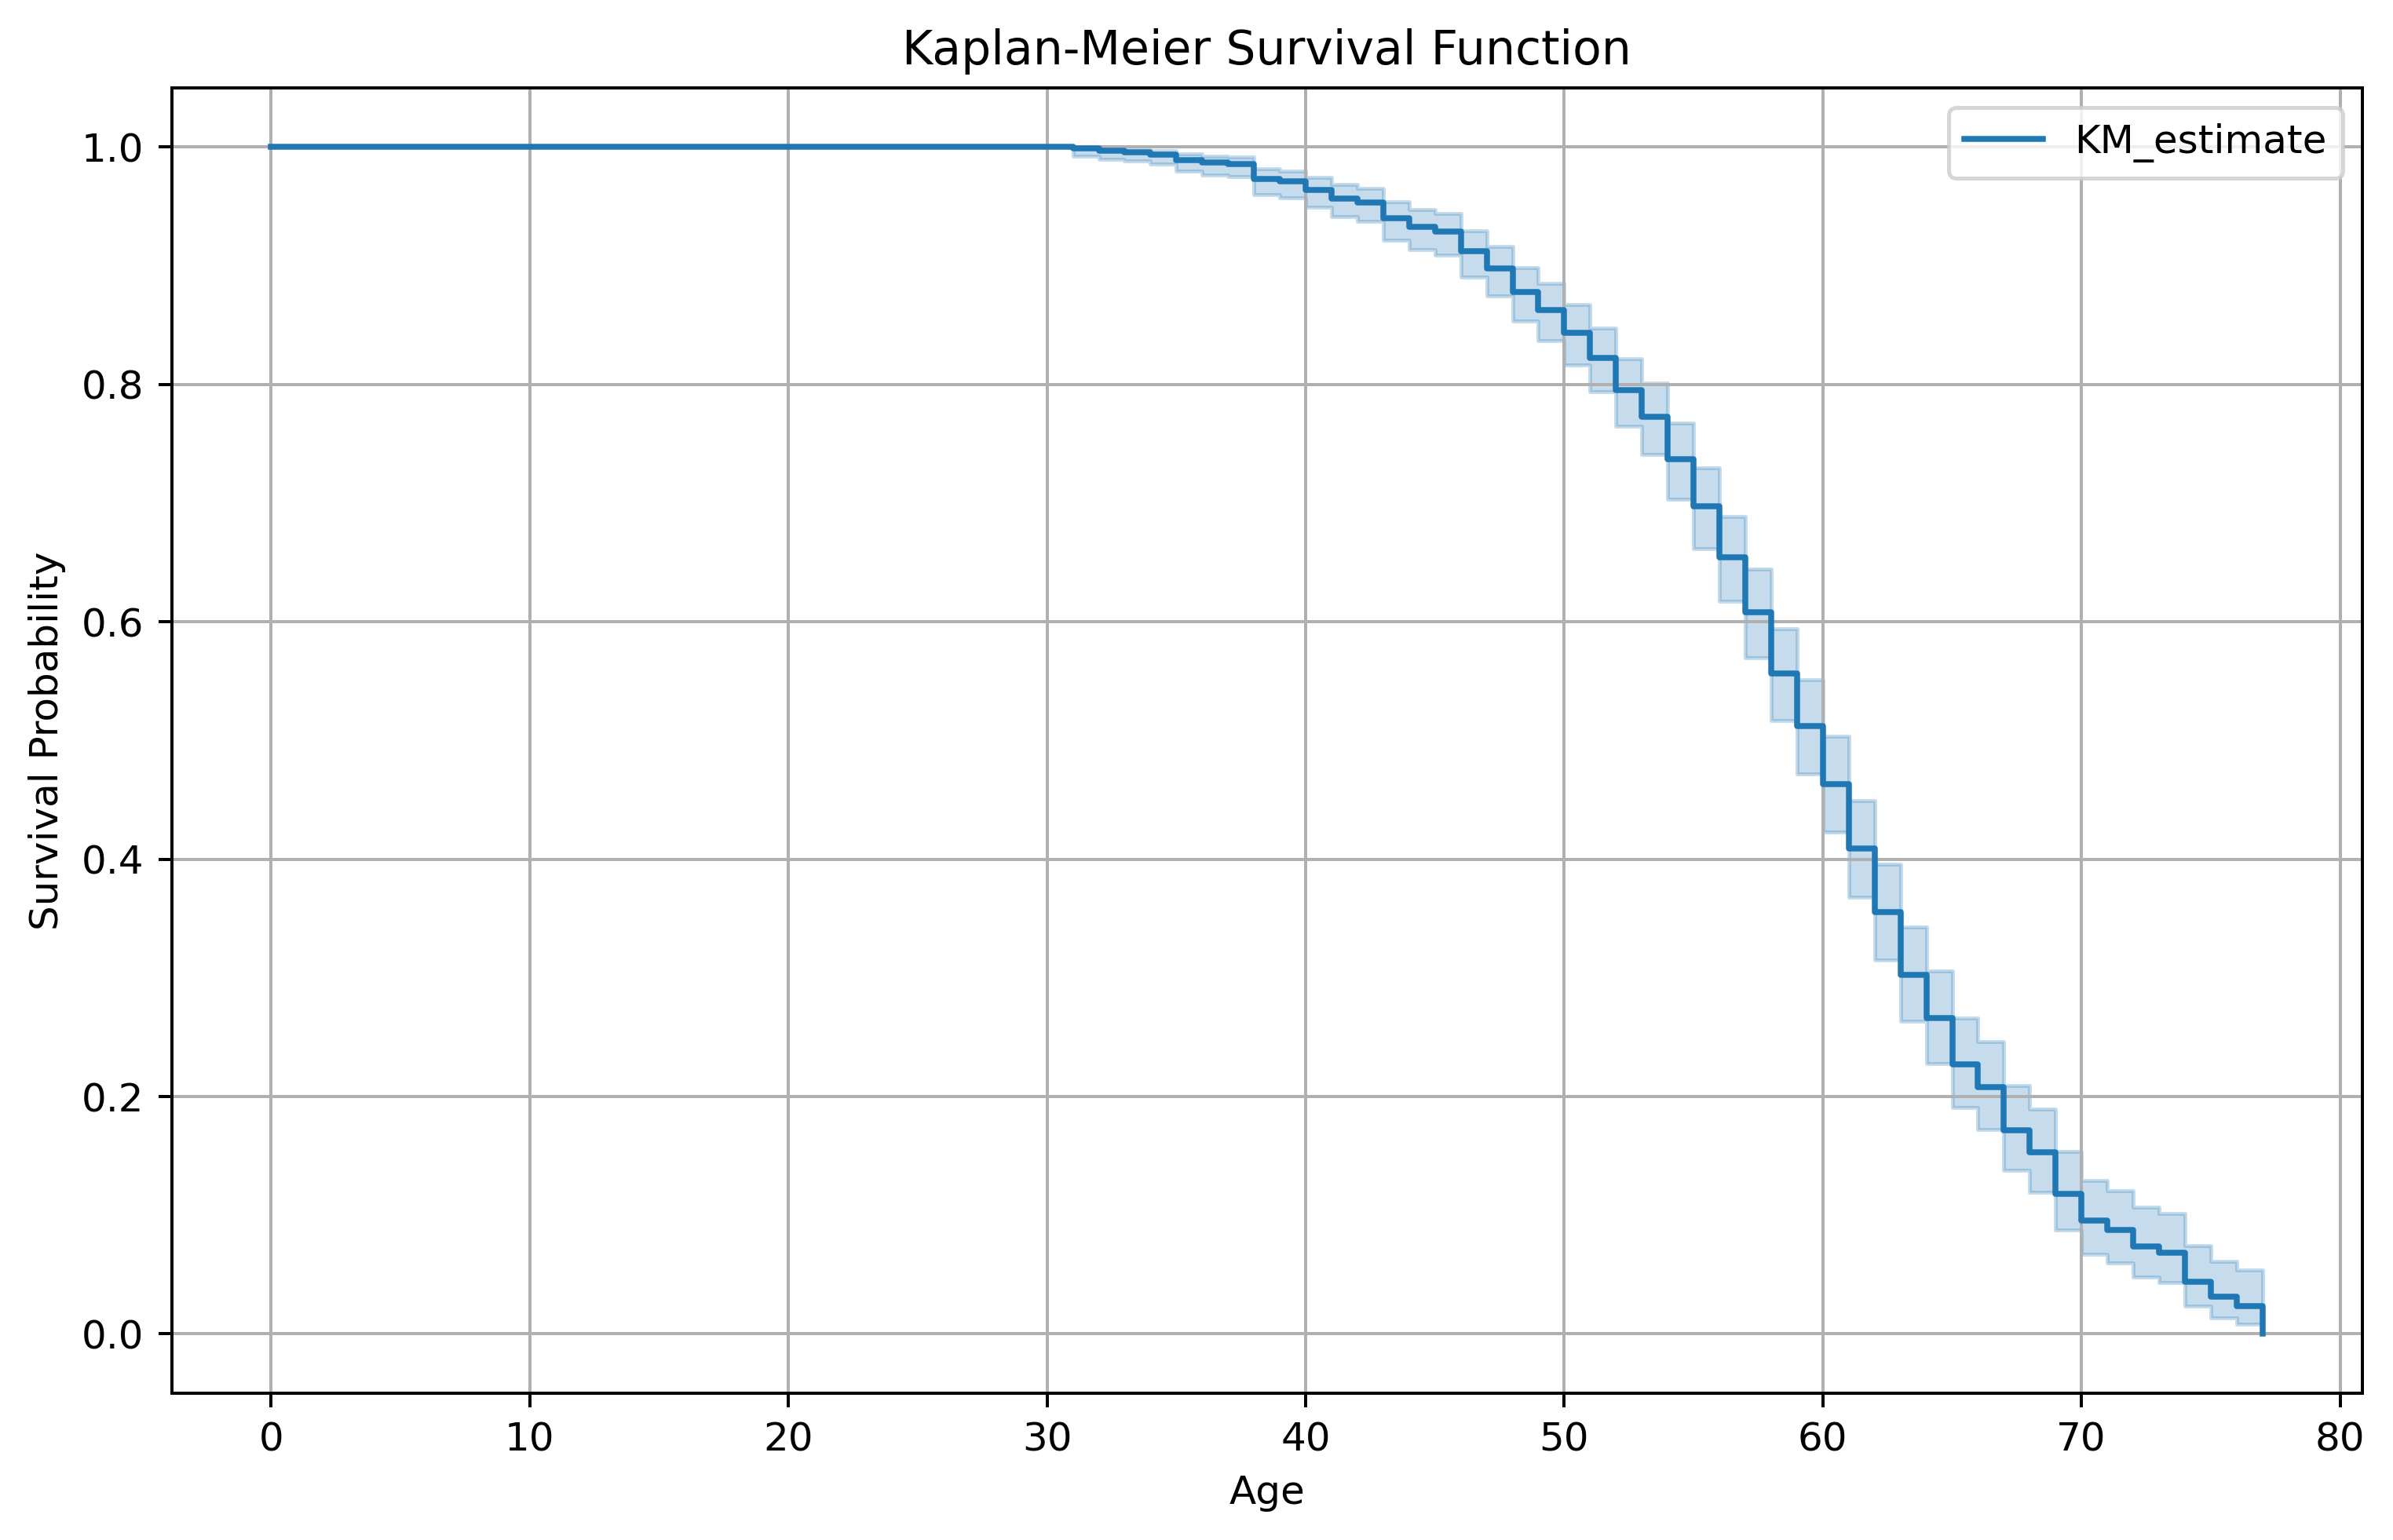

In [4]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Initialize the Kaplan-Meier fitter
kmf = KaplanMeierFitter()

# Fit the model
kmf.fit(durations=survival_data['time'], event_observed=survival_data['event'])

# Plot the survival function
plt.figure(figsize=(10, 6), dpi=360)
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.grid()
plt.show()


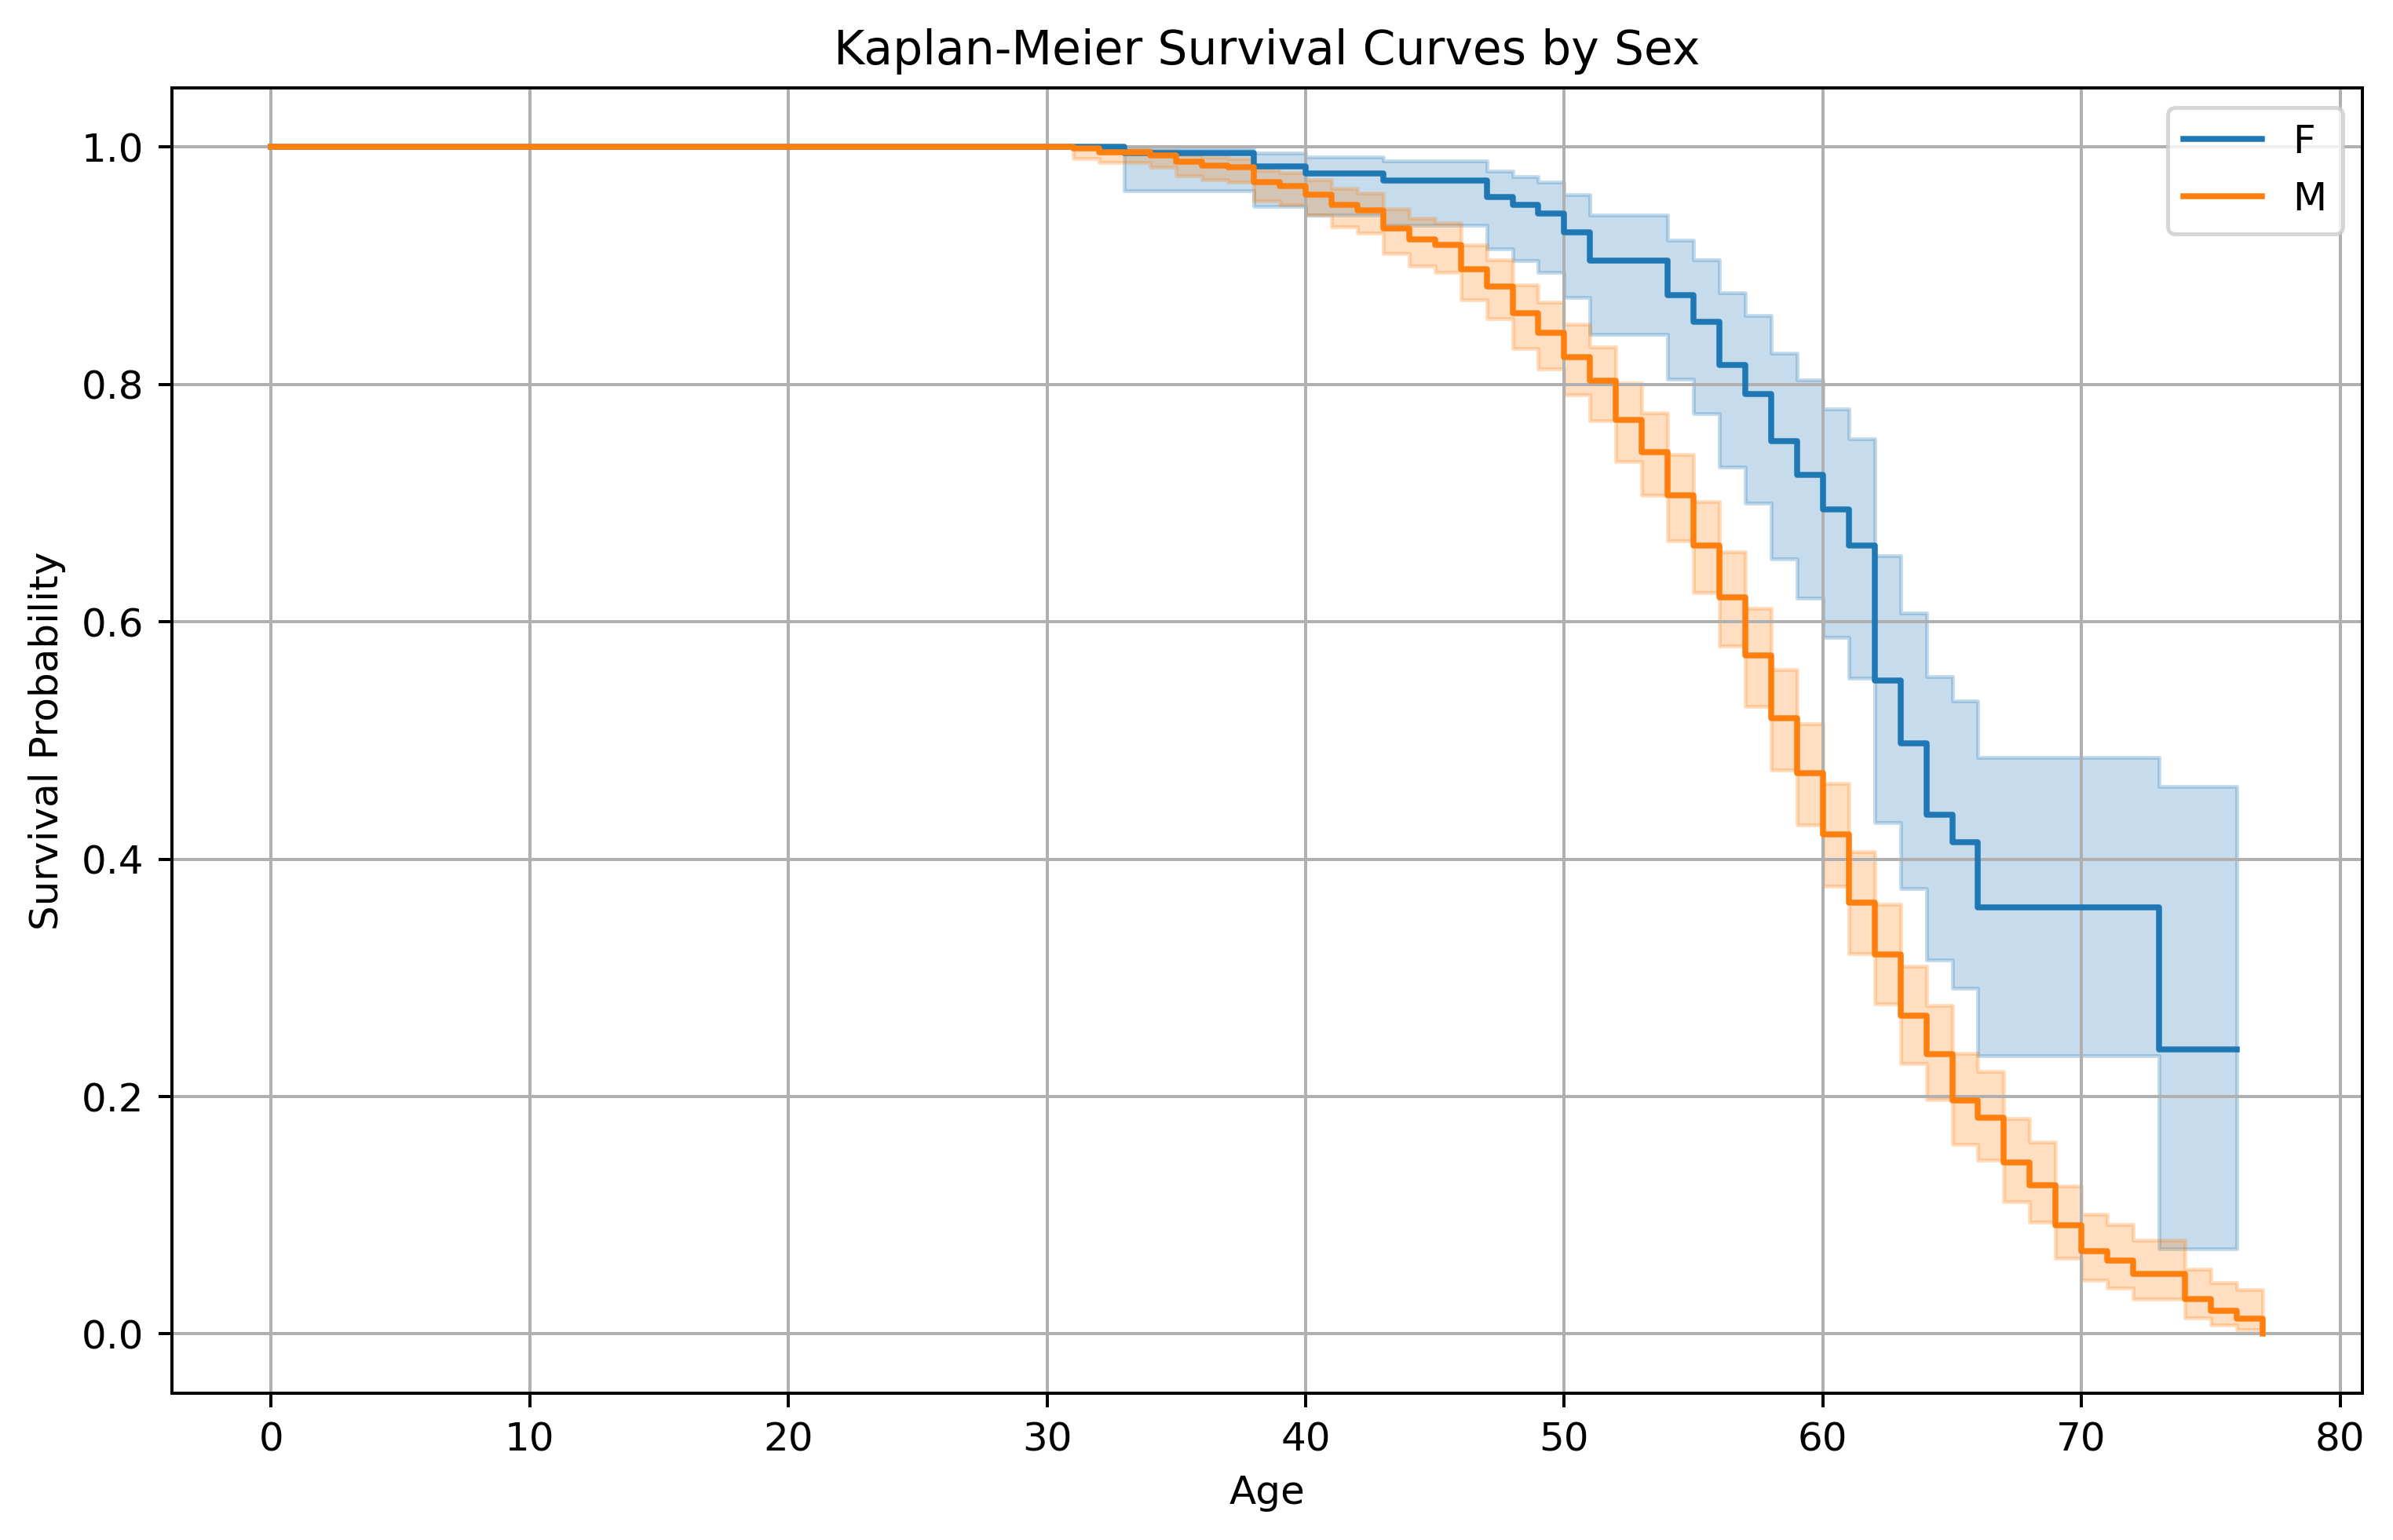

In [5]:
# Plot survival curves stratified by sex
plt.figure(figsize=(10, 6), dpi=360)

for sex, group in df.groupby('Sex'):
    kmf.fit(durations=group['Age'], event_observed=group['HeartDisease'], label=sex)
    kmf.plot_survival_function()

plt.title('Kaplan-Meier Survival Curves by Sex')
plt.xlabel('Age')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid()
plt.show()


In [98]:
# Convert categorical variables to numerical using one-hot encoding
cox_data = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)

# Rename the event column for compatibility with lifelines
cox_data['event'] = df['HeartDisease']

# Now drop the original HeartDisease column
cox_data.drop(columns=['HeartDisease'], inplace=True)


In [100]:
print(cox_data['time'].value_counts())
nt(cox_data.isnull().sum())
​
Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
time                 0
event                0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64
print(cox_data.dtypes)
​
Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
time                   int64
event                  int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object
​

1825    918
Name: time, dtype: int64


In [101]:
print(cox_data.isnull().sum())


Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
time                 0
event                0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


In [102]:
print(cox_data.dtypes)


Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
time                   int64
event                  int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object


<lifelines.CoxPHFitter: fitted with 918 total observations, 410 right-censored observations>
             duration col = 'time'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 918
number of events observed = 508
   partial log-likelihood = -3001.19
         time fit was run = 2024-10-30 06:27:54 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                 
Age                 0.01       1.01       0.01            -0.00             0.02                 1.00                 1.02
RestingBP           0.00       1.00       0.00            -0.00             0.01                 1.00                 1.01
Cholesterol        -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
FastingBS           0.35       1.41       0.10             0.15             0.54                 1.16                 1.72
MaxHR              -0.00       1.00       0.00            -0.01             0.00                 0.99                 1.00
Oldpeak             0.13       1.13       0.05             0.03             0.22                 1.03                 1.24
Sex_M               0.68       1.97       0.16             0.37             0.98                 1.45                 2.67
ChestPainType_ATA  -1.16       0.31       0.22            -1.60            -0.72                 0.20                 0.49
ChestPainType_NAP  -0.71       0.49       0.13            -0.97            -0.45                 0.38                 0.64
ChestPainType_TA   -0.59       0.55       0.24            -1.07            -0.12                 0.34                 0.89
RestingECG_Normal  -0.07       0.94       0.12            -0.30             0.17                 0.74                 1.18
RestingECG_ST      -0.09       0.91       0.14            -0.37             0.18                 0.69                 1.20
ExerciseAngina_Y    0.33       1.40       0.11             0.12             0.54                 1.13                 1.72
ST_Slope_Flat       0.39       1.48       0.16             0.08             0.70                 1.08                 2.02
ST_Slope_Up        -0.91       0.40       0.21            -1.32            -0.50                 0.27                 0.61

                    cmp to     z      p   -log2(p)
covariate                                         
Age                   0.00  1.13   0.26       1.95
RestingBP             0.00  0.49   0.62       0.69
Cholesterol           0.00 -3.34 <0.005      10.22
FastingBS             0.00  3.45 <0.005      10.78
MaxHR                 0.00 -1.01   0.31       1.67
Oldpeak               0.00  2.66   0.01       6.99
Sex_M                 0.00  4.38 <0.005      16.34
ChestPainType_ATA     0.00 -5.17 <0.005      22.03
ChestPainType_NAP     0.00 -5.26 <0.005      22.75
ChestPainType_TA      0.00 -2.45   0.01       6.12
RestingECG_Normal     0.00 -0.55   0.58       0.79
RestingECG_ST         0.00 -0.67   0.50       0.99
ExerciseAngina_Y      0.00  3.11 <0.005       9.05
ST_Slope_Flat         0.00  2.45   0.01       6.15
ST_Slope_Up           0.00 -4.36 <0.005      16.22
---
Concordance = 0.93
Partial AIC = 6032.37
log-likelihood ratio test = 574.74 on 15 df
-log2(p) of ll-ratio test = 372.34

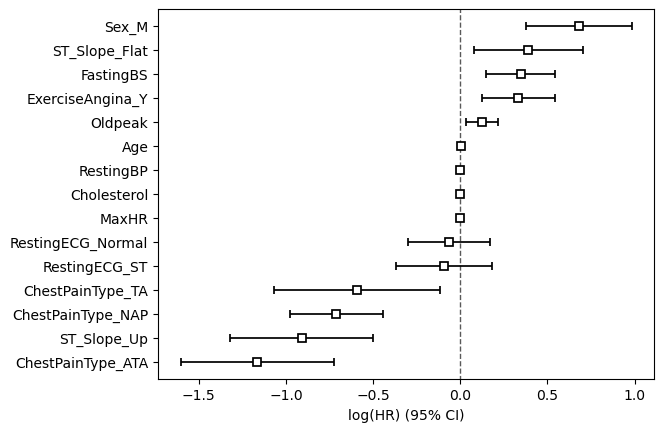

In [104]:
from lifelines import CoxPHFitter

# Initialize the model
cph = CoxPHFitter()

# Fit the model
try:
    cph.fit(cox_data, duration_col='time', event_col='event')
    cph.print_summary()
    
    # Optional: Plot the survival function
    cph.plot()
except Exception as e:
    print(f"Error during fitting: {e}")


In [6]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint 

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [7]:
heart_faliure_data = pd.read_csv(filepath_or_buffer = 'heart.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [9]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder = LabelEncoder()
heart_faliure_data['ST_Slope'] = label_encoder.fit_transform(heart_faliure_data['ST_Slope'])

# One-Hot Encoding for nominal variables
heart_faliure_data = pd.get_dummies(heart_faliure_data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'])

In [10]:
heart_faliure_data.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  ST_Slope  \
0   40        140          289          0    172      0.0         2   
1   49        160          180          0    156      1.0         1   
2   37        130          283          0     98      0.0         2   
3   48        138          214          0    108      1.5         1   
4   54        150          195          0    122      0.0         2   

   HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  \
0             0      0      1                  0                  1   
1             1      1      0                  0                  0   
2             0      0      1                  0                  1   
3             1      1      0                  1                  0   
4             0      0      1                  0                  0   

   ChestPainType_NAP  ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  \
0                  0                 0               0                  1   
1                  1                 0               0                  1   
2                  0                 0               0                  0   
3                  0                 0               0                  1   
4                  1                 0               0                  1   

   RestingECG_ST  ExerciseAngina_N  ExerciseAngina_Y  
0              0                 1                 0  
1              0                 1                 0  
2              1                 1                 0  
3              0                 0                 1  
4              0                 1                 0

In [11]:
X = heart_faliure_data.drop(columns=['HeartDisease'])
y = heart_faliure_data[['HeartDisease']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90, test_size = 0.10, random_state = 109)

print("X_Train Shape:", X_train.shape)
print("Y_Train Shape:", y_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Test Shape:", y_test.shape)

X_Train Shape: (826, 18)
Y_Train Shape: (826, 1)
X_Test Shape: (92, 18)
Y_Test Shape: (92, 1)


In [15]:
from catboost import CatBoostClassifier

# Initialize the model
catboost = CatBoostClassifier(verbose=0, random_state=100)

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1],
    'l2_leaf_reg': [3, 5, 7]
}

# Grid search
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, 
                           scoring='accuracy', n_jobs=-1, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

# Output best parameters
print("Best Parameters:", grid_search.best_params_)
print("\nBest Classifier:", grid_search.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.01}

Best Classifier: <catboost.core.CatBoostClassifier object at 0x0000025BBF23E2D0>


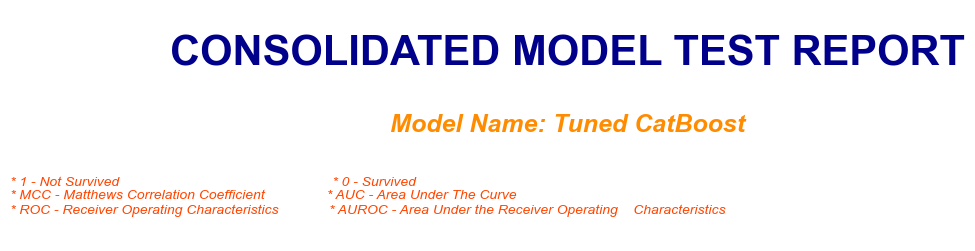

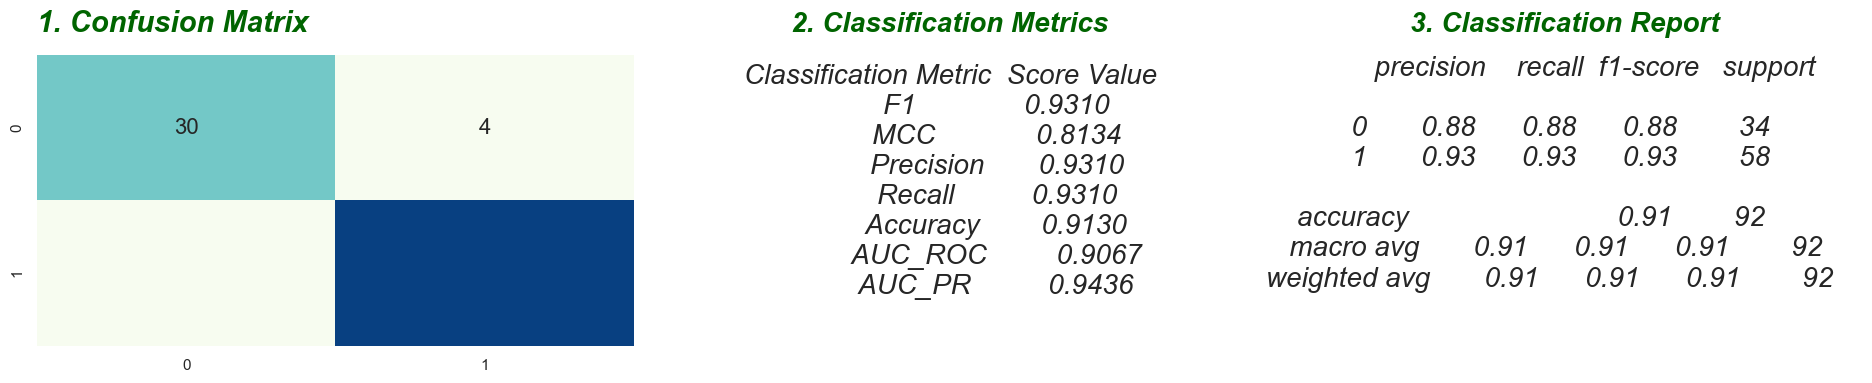

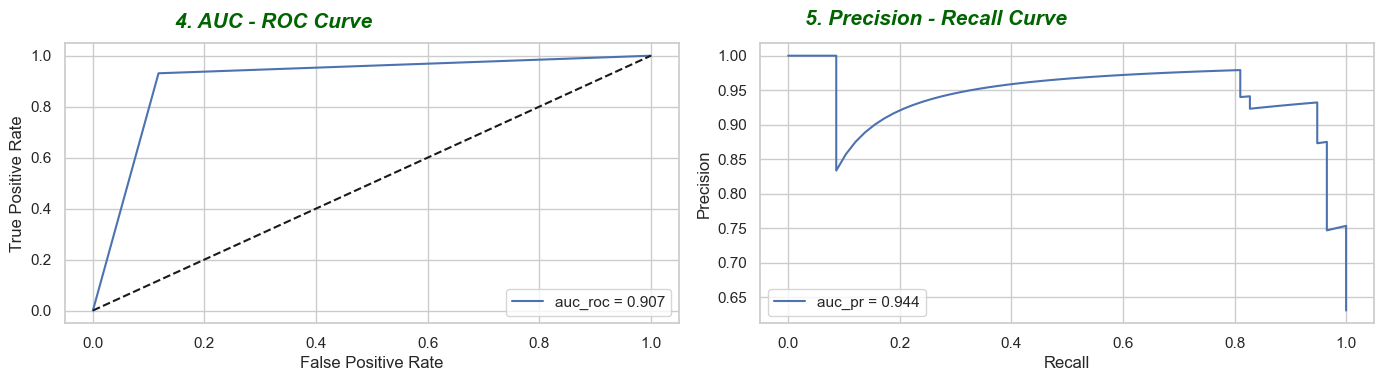

In [20]:
# Extract the best CatBoost model from grid search
best_catboost = grid_search.best_estimator_

# Fit the model to the training data
best_catboost.fit(X_train, y_train)

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_catboost, X_test, y_test, model_name="Tuned CatBoost")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


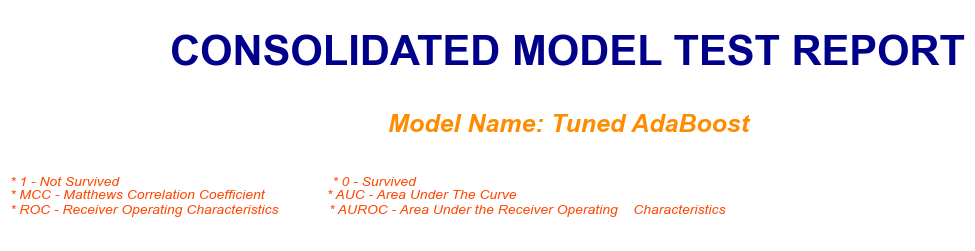

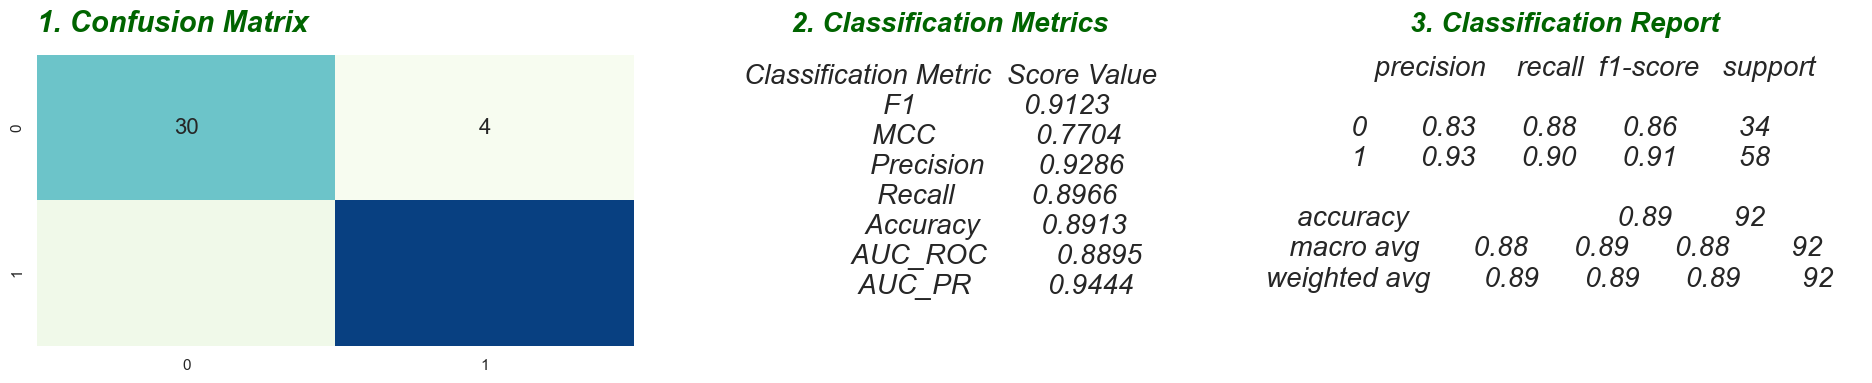

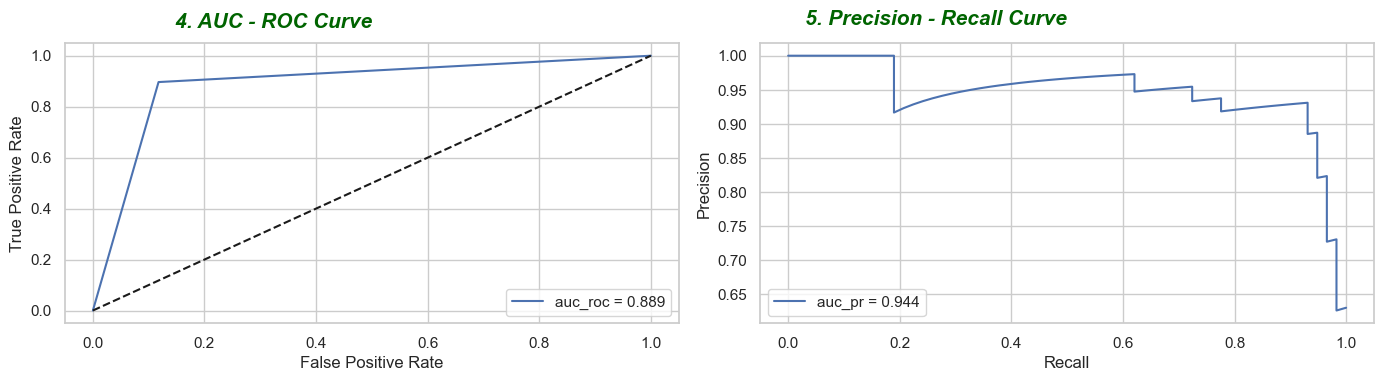

In [21]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost
adaboost = AdaBoostClassifier(random_state=100)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Perform GridSearchCV
adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=param_grid, 
                             scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

# Fit the model
adaboost_grid.fit(X_train, y_train.values.ravel())

# Best estimator
best_adaboost = adaboost_grid.best_estimator_
best_adaboost = best_adaboost.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_adaboost, X_test, y_test, model_name="Tuned AdaBoost")


Fitting 5 folds for each of 72 candidates, totalling 360 fits


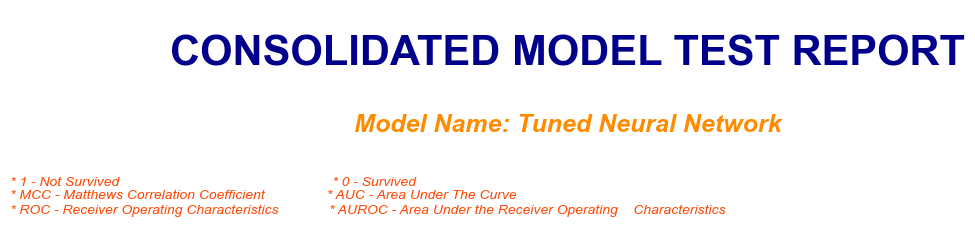

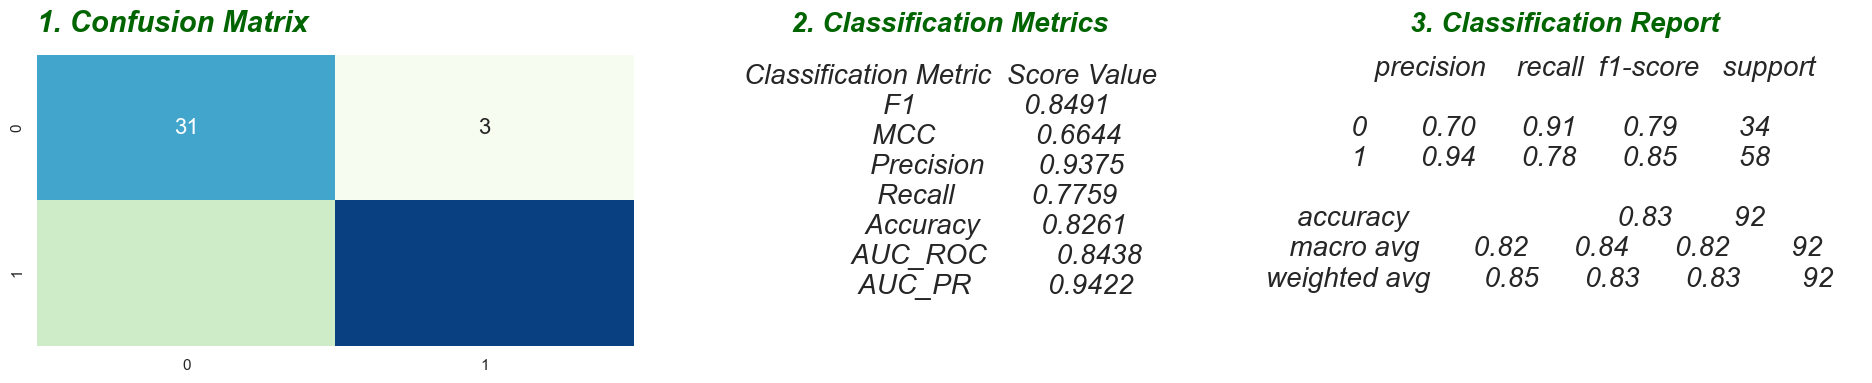

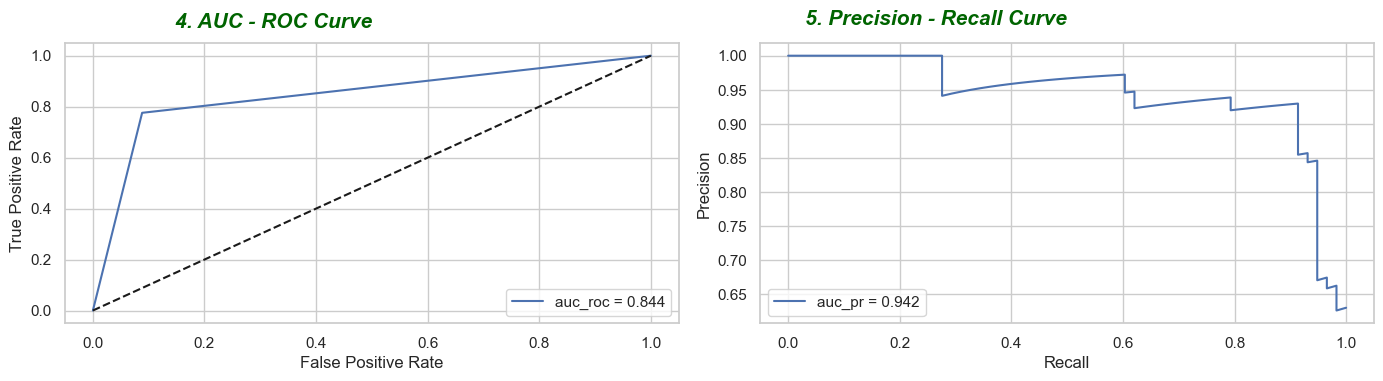

In [22]:
from sklearn.neural_network import MLPClassifier

# Initialize MLP Classifier
mlp = MLPClassifier(random_state=100)

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (150, 150)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000]
}

# Perform GridSearchCV
mlp_grid = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                        scoring='accuracy', n_jobs=-1, cv=5, verbose=2)

# Fit the model
mlp_grid.fit(X_train, y_train.values.ravel())

# Best estimator
best_mlp = mlp_grid.best_estimator_
best_mlp = best_mlp.fit(X_train, y_train.values.ravel())

# Generate the model test classification report
utils.Generate_Model_Test_Classification_Report(best_mlp, X_test, y_test, model_name="Tuned Neural Network")


In [14]:
pip install catboost


   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 578.7 kB/s eta 0:02:55
   ---------------------------------------- 0.5/101.7 MB 578.7 kB/s eta 0:02:55
   ---------------------------------------- 0.8/101.7 MB 589.1 kB/s eta 0:02:52
   ---------------------------------------- 0.8/101.7 MB 589.1 kB/s eta 0:02:52
   ---------------------------------------- 1.0/101.7 MB 592.2 kB/s eta 0:02:51
    --------------------------------------- 1.3/101.7 MB 627.1 kB/s eta 0:02:41
    --------------------------------------- 1.6/101.7 MB 671.1 kB/s eta 0:02:30
    ----------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
print("AdaBoost best parameter",adaboost_grid.best_estimator_)

AdaBoost best parameter AdaBoostClassifier(learning_rate=0.5, random_state=100)


In [24]:
print("MLP",mlp_grid.best_estimator_)

MLP MLPClassifier(hidden_layer_sizes=(150, 150), random_state=100)
